In [1]:
import chess
import chess.pgn
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, SimpleRNN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
class Chess_opening:
    def __init__(self):
        self.opening = {
            'A00': 'Irregular chess opening',
            'A01': 'Nimzovich-Larsen attack',
            'A02': 'Bird opening',
            'A03': 'Bird opening',
            'A04': 'Reti opening',
            'A05': 'Reti opening',
            'A06': 'Reti opening',
            'A07': 'Reti opening',
            'A08': 'Reti opening',
            'A09': 'Reti opening',
            'A10': 'English opening',
            'A11': 'English opening',
            'A12': 'English opening',
            'A13': 'English opening',
            'A14': 'English opening',
            'A15': 'English opening',
            'A16': 'English opening',
            'A17': 'English opening',
            'A18': 'English opening',
            'A19': 'English opening',
            'A20': 'English opening',
            'A21': 'English opening',
            'A22': 'English opening',
            'A23': 'English opening',
            'A24': 'English opening',
            'A25': 'English opening',
            'A26': 'English opening',
            'A27': 'English opening',
            'A28': 'English opening',
            'A29': 'English opening',
            'A30': 'English opening',
            'A31': 'English opening',
            'A32': 'English opening',
            'A33': 'English opening',
            'A34': 'English opening',
            'A35': 'English opening',
            'A36': 'English opening',
            'A37': 'English opening',
            'A38': 'English opening',
            'A39': 'English opening',
            'A40': '1.d4 other',
            'A41': '1.d4 other',
            'A42': '1.d4 other',
            'A43': '1.d4 other',
            'A44': '1.d4 other',
            'A45': '1.d4 other',
            'A46': '1.d4 other',
            'A47': '1.d4 other',
            'A48': '1.d4 other',
            'A49': '1.d4 other',
            'A50': '1.d4 other',
            'A51': 'Budapest gambit',
            'A52': 'Budapest gambit',
            'A53': 'Old Indian defence',
            'A54': 'Old Indian defence',
            'A55': 'Old Indian defence',
            'A56': 'Benoni defense',
            'A57': 'Benko gambit',
            'A58': 'Benko gambit',
            'A59': 'Benko gambit',
            'A60': 'Benoni defense',
            'A61': 'Benoni defense',
            'A62': 'Benoni defense',
            'A63': 'Benoni defense',
            'A64': 'Benoni defense',
            'A65': 'Benoni defense',
            'A66': 'Benoni defense',
            'A67': 'Benoni defense',
            'A68': 'Benoni defense',
            'A69': 'Benoni defense',
            'A70': 'Benoni defense',
            'A71': 'Benoni defense',
            'A72': 'Benoni defense',
            'A73': 'Benoni defense',
            'A74': 'Benoni defense',
            'A75': 'Benoni defense',
            'A76': 'Benoni defense',
            'A77': 'Benoni defense',
            'A78': 'Benoni defense',
            'A79': 'Benoni defense',
            'A80': 'Dutch defense',
            'A81': 'Dutch defense',
            'A82': 'Dutch defense',
            'A83': 'Dutch defense',
            'A84': 'Dutch defense',
            'A85': 'Dutch defense',
            'A86': 'Dutch defense',
            'A87': 'Dutch defense',
            'A88': 'Dutch defense',
            'A89': 'Dutch defense',
            'A90': 'Dutch defense',
            'A91': 'Dutch defense',
            'A92': 'Dutch defense',
            'A93': 'Dutch defense',
            'A94': 'Dutch defense',
            'A95': 'Dutch defense',
            'A96': 'Dutch defense',
            'A97': 'Dutch defense',
            'A98': 'Dutch defense',
            'A99': 'Dutch defense',
            'B00': '1.e4 other',
            'B01': 'Scandinavian defense',
            'B02': 'Alekhine defense',
            'B03': 'Alekhine defense',
            'B04': 'Alekhine defense',
            'B05': 'Alekhine defense',
            'B06': 'Robatsch defense',
            'B07': 'Pirc defense',
            'B08': 'Pirc defense',
            'B09': 'Pirc defense',
            'B10': 'Caro-Kann defense',
            'B11': 'Caro-Kann defense',
            'B12': 'Caro-Kann defense',
            'B13': 'Caro-Kann defense',
            'B14': 'Caro-Kann defense',
            'B15': 'Caro-Kann defense',
            'B16': 'Caro-Kann defense',
            'B17': 'Caro-Kann defense',
            'B18': 'Caro-Kann defense',
            'B19': 'Caro-Kann defense',
            'B20': 'Sicilian defense',
            'B21': 'Sicilian defense',
            'B22': 'Sicilian defense',
            'B23': 'Sicilian defense',
            'B24': 'Sicilian defense',
            'B25': 'Sicilian defense',
            'B26': 'Sicilian defense',
            'B27': 'Sicilian defense',
            'B28': 'Sicilian defense',
            'B29': 'Sicilian defense',
            'B30': 'Sicilian defense',
            'B31': 'Sicilian defense',
            'B32': 'Sicilian defense',
            'B33': 'Sicilian defense',
            'B34': 'Sicilian defense',
            'B35': 'Sicilian defense',
            'B36': 'Sicilian defense',
            'B37': 'Sicilian defense',
            'B38': 'Sicilian defense',
            'B39': 'Sicilian defense',
            'B40': 'Sicilian defense',
            'B41': 'Sicilian defense',
            'B42': 'Sicilian defense',
            'B43': 'Sicilian defense',
            'B44': 'Sicilian defense',
            'B45': 'Sicilian defense',
            'B46': 'Sicilian defense',
            'B47': 'Sicilian defense',
            'B48': 'Sicilian defense',
            'B49': 'Sicilian defense',
            'B50': 'Sicilian defense',
            'B51': 'Sicilian defense',
            'B52': 'Sicilian defense',
            'B53': 'Sicilian defense',
            'B54': 'Sicilian defense',
            'B55': 'Sicilian defense',
            'B56': 'Sicilian defense',
            'B57': 'Sicilian defense',
            'B58': 'Sicilian defense',
            'B59': 'Sicilian defense',
            'B60': 'Sicilian defense',
            'B61': 'Sicilian defense',
            'B62': 'Sicilian defense',
            'B63': 'Sicilian defense',
            'B64': 'Sicilian defense',
            'B65': 'Sicilian defense',
            'B66': 'Sicilian defense',
            'B67': 'Sicilian defense',
            'B68': 'Sicilian defense',
            'B69': 'Sicilian defense',
            'B70': 'Sicilian defense',
            'B71': 'Sicilian defense',
            'B72': 'Sicilian defense',
            'B73': 'Sicilian defense',
            'B74': 'Sicilian defense',
            'B75': 'Sicilian defense',
            'B76': 'Sicilian defense',
            'B77': 'Sicilian defense',
            'B78': 'Sicilian defense',
            'B79': 'Sicilian defense',
            'B80': 'Sicilian defense',
            'B81': 'Sicilian defense',
            'B82': 'Sicilian defense',
            'B83': 'Sicilian defense',
            'B84': 'Sicilian defense',
            'B85': 'Sicilian defense',
            'B86': 'Sicilian defense',
            'B87': 'Sicilian defense',
            'B88': 'Sicilian defense',
            'B89': 'Sicilian defense',
            'B90': 'Sicilian defense',
            'B91': 'Sicilian defense',
            'B92': 'Sicilian defense',
            'B93': 'Sicilian defense',
            'B94': 'Sicilian defense',
            'B95': 'Sicilian defense',
            'B96': 'Sicilian defense',
            'B97': 'Sicilian defense',
            'B98': 'Sicilian defense',
            'B99': 'Sicilian defense',
            'C00': 'French defense',
            'C01': 'French defense',
            'C02': 'French defense',
            'C03': 'French defense',
            'C04': 'French defense',
            'C05': 'French defense',
            'C06': 'French defense',
            'C07': 'French defense',
            'C08': 'French defense',
            'C09': 'French defense',
            'C10': 'French defense',
            'C11': 'French defense',
            'C12': 'French defense',
            'C13': 'French defense',
            'C14': 'French defense',
            'C15': 'French defense',
            'C16': 'French defense',
            'C17': 'French defense',
            'C18': 'French defense',
            'C19': 'French defense',
            'C20': '1.e4 e5 other',
            'C21': 'Center game',
            'C22': 'Center game',
            'C23': 'Bishop opening',
            'C24': 'Bishop opening',
            'C25': 'Vienna game',
            'C26': 'Vienna game',
            'C27': 'Vienna game',
            'C28': 'Vienna game',
            'C29': 'Vienna game',
            'C30': 'King gambit',
            'C31': 'King gambit',
            'C32': 'King gambit',
            'C33': 'King gambit',
            'C34': 'King gambit',
            'C35': 'King gambit',
            'C36': 'King gambit',
            'C37': 'King gambit',
            'C38': 'King gambit',
            'C39': 'King gambit',
            'C40': '1.e4 e5 2.Sf3 other',
            'C41': 'Philidor defense',
            'C42': 'Petrov defense',
            'C43': 'Petrov defense',
            'C44': '1.e4 e5 2.Sf3 Sc6 other',
            'C45': 'Scotch game',
            'C46': 'Three knights game',
            'C47': 'Four knights game',
            'C48': 'Four knights game',
            'C49': 'Four knights game',
            'C50': 'Giuoco Piano',
            'C51': 'Giuoco Piano',
            'C52': 'Giuoco Piano',
            'C53': 'Giuoco Piano',
            'C54': 'Giuoco Piano',
            'C55': 'Two knights game',
            'C56': 'Two knights game',
            'C57': 'Two knights game',
            'C58': 'Two knights game',
            'C59': 'Two knights game',
            'C60': 'Ruy Lopez',
            'C61': 'Ruy Lopez',
            'C62': 'Ruy Lopez',
            'C63': 'Ruy Lopez',
            'C64': 'Ruy Lopez',
            'C65': 'Ruy Lopez',
            'C66': 'Ruy Lopez',
            'C67': 'Ruy Lopez',
            'C68': 'Ruy Lopez',
            'C69': 'Ruy Lopez',
            'C70': 'Ruy Lopez',
            'C71': 'Ruy Lopez',
            'C72': 'Ruy Lopez',
            'C73': 'Ruy Lopez',
            'C74': 'Ruy Lopez',
            'C75': 'Ruy Lopez',
            'C76': 'Ruy Lopez',
            'C77': 'Ruy Lopez',
            'C78': 'Ruy Lopez',
            'C79': 'Ruy Lopez',
            'C80': 'Ruy Lopez',
            'C81': 'Ruy Lopez',
            'C82': 'Ruy Lopez',
            'C83': 'Ruy Lopez',
            'C84': 'Ruy Lopez',
            'C85': 'Ruy Lopez',
            'C86': 'Ruy Lopez',
            'C87': 'Ruy Lopez',
            'C88': 'Ruy Lopez',
            'C89': 'Ruy Lopez',
            'C90': 'Ruy Lopez',
            'C91': 'Ruy Lopez',
            'C92': 'Ruy Lopez',
            'C93': 'Ruy Lopez',
            'C94': 'Ruy Lopez',
            'C95': 'Ruy Lopez',
            'C96': 'Ruy Lopez',
            'C97': 'Ruy Lopez',
            'C98': 'Ruy Lopez',
            'C99': 'Ruy Lopez',
            'D00': '1.d4 d5 other',
            'D01': 'Queen pawn game',
            'D02': 'Queen pawn game',
            'D03': 'Queen pawn game',
            'D04': 'Queen pawn game',
            'D05': 'Queen pawn game',
            'D06': 'Queen gambit other',
            'D07': 'Chigorin defense',
            'D08': 'Albin countergambit',
            'D09': 'Albin countergambit',
            'D10': 'Slav defense',
            'D11': 'Slav defense',
            'D12': 'Slav defense',
            'D13': 'Slav defense',
            'D14': 'Slav defense',
            'D15': 'Slav defense',
            'D16': 'Slav defense',
            'D17': 'Slav defense',
            'D18': 'Slav defense',
            'D19': 'Slav defense',
            'D20': 'Queen gambit accepted',
            'D21': 'Queen gambit accepted',
            'D22': 'Queen gambit accepted',
            'D23': 'Queen gambit accepted',
            'D24': 'Queen gambit accepted',
            'D25': 'Queen gambit accepted',
            'D26': 'Queen gambit accepted',
            'D27': 'Queen gambit accepted',
            'D28': 'Queen gambit accepted',
            'D29': 'Queen gambit accepted',
            'D30': 'Queen gambit declined',
            'D31': 'Queen gambit declined',
            'D32': 'Queen gambit declined',
            'D33': 'Queen gambit declined',
            'D34': 'Queen gambit declined',
            'D35': 'Queen gambit declined',
            'D36': 'Queen gambit declined',
            'D37': 'Queen gambit declined',
            'D38': 'Queen gambit declined',
            'D39': 'Queen gambit declined',
            'D40': 'Queen gambit declined',
            'D41': 'Queen gambit declined',
            'D42': 'Queen gambit declined',
            'D43': 'Queen gambit declined',
            'D44': 'Queen gambit declined',
            'D45': 'Queen gambit declined',
            'D46': 'Queen gambit declined',
            'D47': 'Queen gambit declined',
            'D48': 'Queen gambit declined',
            'D49': 'Queen gambit declined',
            'D50': 'Queen gambit declined',
            'D51': 'Queen gambit declined',
            'D52': 'Queen gambit declined',
            'D53': 'Queen gambit declined',
            'D54': 'Queen gambit declined',
            'D55': 'Queen gambit declined',
            'D56': 'Queen gambit declined',
            'D57': 'Queen gambit declined',
            'D58': 'Queen gambit declined',
            'D59': 'Queen gambit declined',
            'D60': 'Queen gambit declined',
            'D61': 'Queen gambit declined',
            'D62': 'Queen gambit declined',
            'D63': 'Queen gambit declined',
            'D64': 'Queen gambit declined',
            'D65': 'Queen gambit declined',
            'D66': 'Queen gambit declined',
            'D67': 'Queen gambit declined',
            'D68': 'Queen gambit declined',
            'D69': 'Queen gambit declined',
            'D70': 'Grunfeld defense',
            'D71': 'Grunfeld defense',
            'D72': 'Grunfeld defense',
            'D73': 'Grunfeld defense',
            'D74': 'Grunfeld defense',
            'D75': 'Grunfeld defense',
            'D76': 'Grunfeld defense',
            'D77': 'Grunfeld defense',
            'D78': 'Grunfeld defense',
            'D79': 'Grunfeld defense',
            'D80': 'Grunfeld defense',
            'D81': 'Grunfeld defense',
            'D82': 'Grunfeld defense',
            'D83': 'Grunfeld defense',
            'D84': 'Grunfeld defense',
            'D85': 'Grunfeld defense',
            'D86': 'Grunfeld defense',
            'D87': 'Grunfeld defense',
            'D88': 'Grunfeld defense',
            'D89': 'Grunfeld defense',
            'D90': 'Grunfeld defense',
            'D91': 'Grunfeld defense',
            'D92': 'Grunfeld defense',
            'D93': 'Grunfeld defense',
            'D94': 'Grunfeld defense',
            'D95': 'Grunfeld defense',
            'D96': 'Grunfeld defense',
            'D97': 'Grunfeld defense',
            'D98': 'Grunfeld defense',
            'D99': 'Grunfeld defense',
            'E00': 'Catalan defense',
            'E01': 'Catalan defense',
            'E02': 'Catalan defense',
            'E03': 'Catalan defense',
            'E04': 'Catalan defense',
            'E05': 'Catalan defense',
            'E06': 'Catalan defense',
            'E07': 'Catalan defense',
            'E08': 'Catalan defense',
            'E09': 'Catalan defense',
            'E10': 'Blumenfeld gambit ',
            'E11': 'Bogo-Indian defence',
            'E12': 'Queen Indian defense',
            'E13': 'Queen Indian defense',
            'E14': 'Queen Indian defense',
            'E15': 'Queen Indian defense',
            'E16': 'Queen Indian defense',
            'E17': 'Queen Indian defense',
            'E18': 'Queen Indian defense',
            'E19': 'Queen Indian defense',
            'E20': 'Nimzowitsch defense',
            'E21': 'Nimzowitsch defense',
            'E22': 'Nimzowitsch defense',
            'E23': 'Nimzowitsch defense',
            'E24': 'Nimzowitsch defense',
            'E25': 'Nimzowitsch defense',
            'E26': 'Nimzowitsch defense',
            'E27': 'Nimzowitsch defense',
            'E28': 'Nimzowitsch defense',
            'E29': 'Nimzowitsch defense',
            'E30': 'Nimzowitsch defense',
            'E31': 'Nimzowitsch defense',
            'E32': 'Nimzowitsch defense',
            'E33': 'Nimzowitsch defense',
            'E34': 'Nimzowitsch defense',
            'E35': 'Nimzowitsch defense',
            'E36': 'Nimzowitsch defense',
            'E37': 'Nimzowitsch defense',
            'E38': 'Nimzowitsch defense',
            'E39': 'Nimzowitsch defense',
            'E40': 'Nimzowitsch defense',
            'E41': 'Nimzowitsch defense',
            'E42': 'Nimzowitsch defense',
            'E43': 'Nimzowitsch defense',
            'E44': 'Nimzowitsch defense',
            'E45': 'Nimzowitsch defense',
            'E46': 'Nimzowitsch defense',
            'E47': 'Nimzowitsch defense',
            'E48': 'Nimzowitsch defense',
            'E49': 'Nimzowitsch defense',
            'E50': 'Nimzowitsch defense',
            'E51': 'Nimzowitsch defense',
            'E52': 'Nimzowitsch defense',
            'E53': 'Nimzowitsch defense',
            'E54': 'Nimzowitsch defense',
            'E55': 'Nimzowitsch defense',
            'E56': 'Nimzowitsch defense',
            'E57': 'Nimzowitsch defense',
            'E58': 'Nimzowitsch defense',
            'E59': 'Nimzowitsch defense',
            'E60': 'King Indian defence',
            'E61': 'King Indian defence',
            'E62': 'King Indian defence',
            'E63': 'King Indian defence',
            'E64': 'King Indian defence',
            'E65': 'King Indian defence',
            'E66': 'King Indian defence',
            'E67': 'King Indian defence',
            'E68': 'King Indian defence',
            'E69': 'King Indian defence',
            'E70': 'King Indian defence',
            'E71': 'King Indian defence',
            'E72': 'King Indian defence',
            'E73': 'King Indian defence',
            'E74': 'King Indian defence',
            'E75': 'King Indian defence',
            'E76': 'King Indian defence',
            'E77': 'King Indian defence',
            'E78': 'King Indian defence',
            'E79': 'King Indian defence',
            'E80': 'King Indian defence',
            'E81': 'King Indian defence',
            'E82': 'King Indian defence',
            'E83': 'King Indian defence',
            'E84': 'King Indian defence',
            'E85': 'King Indian defence',
            'E86': 'King Indian defence',
            'E87': 'King Indian defence',
            'E88': 'King Indian defence',
            'E89': 'King Indian defence',
            'E90': 'King Indian defence',
            'E91': 'King Indian defence',
            'E92': 'King Indian defence',
            'E93': 'King Indian defence',
            'E94': 'King Indian defence',
            'E95': 'King Indian defence',
            'E96': 'King Indian defence',
            'E97': 'King Indian defence',
            'E98': 'King Indian defence',
            'E99': 'King Indian defence',
        }
        self.opening_name = {}
        for eco, name in self.opening.items():
            if name in self.opening_name:
                self.opening_name[name].append(eco)
            else:
                self.opening_name[name] = [eco]

    def get_eco(self, opening_name):
        if opening_name in self.opening_name:
            return self.opening_name[opening_name]
        else:
            return []

In [3]:
class Data:
    def __init__(self, opening_ecos):
        self.opening_ecos = opening_ecos
    
    def extract_game_data(self, game):
        headers = game.headers
        white_elo = int(headers.get('WhiteElo', 0))
        black_elo = int(headers.get('BlackElo', 0))
        result = headers.get('Result', 'N/A')
        eco = headers.get('ECO', 'N/A')
        if result == '0-1':
            result_numeric = 0
        elif result == '1/2-1/2':
            result_numeric = 1
        elif result == '1-0':
            result_numeric = 2
        else: 
            result_numeric = 'N/A'
        return white_elo, black_elo, result_numeric, eco

    def game_data(self, pgn_file):
        white_elo_list = []
        black_elo_list = []
        result_list = []
        eco_list = []
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break
            white_elo, black_elo, result, eco = self.extract_game_data(game)
            white_elo_list.append(white_elo)
            black_elo_list.append(black_elo)
            result_list.append(result)
            eco_list.append(eco)
        return white_elo_list, black_elo_list, result_list, eco_list

    def get_data(self, pgn_file):
        with open(pgn_file, 'r') as pgn_file:
            potential_white_elo, potential_black_elo, potential_result, potential_eco = self.game_data(pgn_file)
        potential_data = np.array([np.array(i) for i in zip(potential_white_elo, potential_black_elo, potential_result, potential_eco)])
        return potential_data
    
    def clear_data(self, pgn_file):
        potential_data = self.get_data(pgn_file)
        white_potential_data = potential_data[:,0].astype(int)
        black_potential_data = potential_data[:,1].astype(int)
        result_potential_data = potential_data[:,2].astype(int)
        eco_potential_data = potential_data[:,3].astype(str)
        return white_potential_data, black_potential_data, result_potential_data, eco_potential_data
    
    def elo_boundary(self):
        min_white_value = 1000
        min_black_value = 1000
        max_white_value = 3000
        max_black_value = 3000
        return min_white_value, min_black_value, max_white_value, max_black_value
    
    def filter_data(self, pgn_file):
        white_potential_data, black_potential_data, result_potential_data, eco_potential_data = self.clear_data(pgn_file)
        min_white_value, min_black_value, max_white_value, max_black_value = self.elo_boundary()
        full_data = []
        for (white_elo, black_elo, result, eco) in zip(white_potential_data, black_potential_data, result_potential_data, eco_potential_data):
            if eco in self.opening_ecos:
                if min_white_value <= white_elo <= max_white_value:
                    if min_black_value <= black_elo <= max_black_value:
                        full_data.append([white_elo, black_elo, result])
        full_data = np.array(full_data)
        return full_data
    
    def get_potential_data(self, pgn_file):
        full_data = self.filter_data(pgn_file)
        X = np.array([full_data[:,0], full_data[:,1]])
        X = list(zip(X[0], X[1]))
        y = list(full_data[:,2])
        return X,y
    
    def count_result(self, pgn_file):
        player_statistics = self.get_potential_data(pgn_file)
        player_statistics = np.array(player_statistics[1])
        count_0 = np.count_nonzero(player_statistics == 0)
        count_1 = np.count_nonzero(player_statistics == 1)
        count_2 = np.count_nonzero(player_statistics == 2)
        return count_0, count_1, count_2
    
    def calculate_statistics(self, pgn_file):
        count_0, count_1, count_2 = self.count_result(pgn_file)
        player_statistics = self.get_potential_data(pgn_file)
        player_statistics = np.array(player_statistics[1])
        percentage_0 = count_0/len(player_statistics)
        percentage_1 = count_1/len(player_statistics)
        percentage_2 = count_2/len(player_statistics)
        return percentage_0, percentage_1, percentage_2
    
    def get_filtered_data(self, pgn_file, train_file_path):
        player_train_data = self.get_potential_data(train_file_path)
        calculate_statistics = self.calculate_statistics(pgn_file)
        count_0, count_1, count_2 = self.count_result(train_file_path)
        y_train = player_train_data[1]
        total_results = len(y_train)
        elements_to_keep = [int(np.floor(total_results * percent)) for percent in calculate_statistics]
        indexes_to_keep_dict = {0: [], 1: [], 2: []}
        for i, label in enumerate(y_train):
            indexes_to_keep_dict[label].append(i)
        for label in indexes_to_keep_dict:
            np.random.shuffle(indexes_to_keep_dict[label])
        indexes_to_keep_flat = np.concatenate([
            indexes_to_keep_dict[0][:min(count_0, elements_to_keep[0])],
            indexes_to_keep_dict[1][:min(count_1, elements_to_keep[1])],
            indexes_to_keep_dict[2][:min(count_2, elements_to_keep[2])]
        ])
        updated_y_train = [y_train[i] for i in indexes_to_keep_flat]
        filtered_train_data = ([player_train_data[0][i] for i in indexes_to_keep_flat], updated_y_train)
        return filtered_train_data
    
    

In [4]:
if __name__ == "__main__":
    train_file_path = 'C:\\Users\\KK\\Master Thesis\\dane\\database.pgn'
    test_file_path = 'C:\\Users\\KK\\Master Thesis\\dane\\twic1521.pgn'
    ratio_data_path = 'C:\\Users\\KK\\Master Thesis\\dane\\twic1522.pgn'
    
    opening_name = "Sicilian defense"
    sample_white_elo = 2400
    sample_black_elo = 2367

    opening = Chess_opening()
    opening_ecos = opening.get_eco(opening_name)
    
    data = Data(opening_ecos)

In [5]:
X_train, y_train = data.get_filtered_data(ratio_data_path, train_file_path)
X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
X_test, y_test = data.get_filtered_data(ratio_data_path, test_file_path)

illegal san: 'Nxf3' in rnbqkbnr/pppppppp/8/8/8/2N5/PPPPPPPP/R1BQKBNR b KQkq - 1 1 while parsing <Game at 0x177b6a97910 ('Lecomte,Robin' vs. 'Kalle,Erwin', '2023.03.11' at 'Netherlands NED')>
illegal san: 'Nxf3' in rnbqkbnr/pppppppp/8/8/8/2N5/PPPPPPPP/R1BQKBNR b KQkq - 1 1 while parsing <Game at 0x177b6e3f3a0 ('Lecomte,Robin' vs. 'Kalle,Erwin', '2023.03.11' at 'Netherlands NED')>


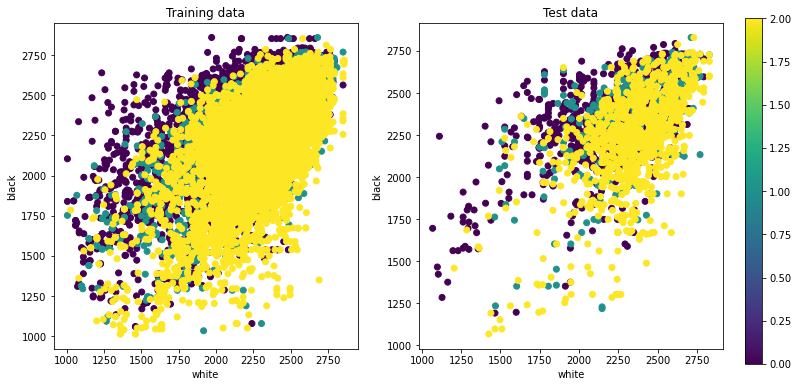

In [58]:
X_train_plot = list(zip(*X_train))
X_test_plot = list(zip(*X_test))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sc1 = axs[0].scatter(X_train_plot[0], X_train_plot[1], c=y_train)
axs[0].set_title('Training data')
axs[0].set_xlabel('white')
axs[0].set_ylabel('black')


sc2 = axs[1].scatter(X_test_plot[0], X_test_plot[1], c=y_test)
axs[1].set_title('Test data')
axs[1].set_xlabel('white')
axs[1].set_ylabel('black')

cax = fig.add_axes([0.925, 0.09, 0.02, 0.8])
cbar2 = plt.colorbar(sc2, cax=cax)
cbar2.set_label('')



# k-NN

In [42]:
class KNN:
    def __init__(self, X_train, y_train, X_test, y_test, k_neighbors):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.k_neighbors = k_neighbors
        self.model = None 

    def build_and_train_model(self):
        model = KNeighborsClassifier(n_neighbors=self.k_neighbors)
        model.fit(self.X_train, self.y_train)
        self.model = model
        accuracy = model.score(self.X_test, self.y_test)
        return accuracy

    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

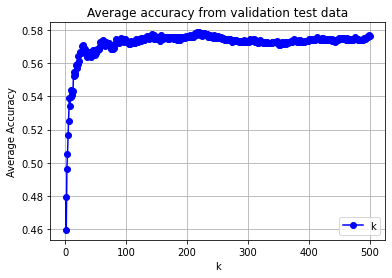

Best k from validation test data is: 216


In [9]:
k_neighbors_values = []
average_accuracy_values = []

for k in range(1, 501):
    accuracy_values_for_k = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_knn = KNN(X_validate, y_validate, X_test_validate, y_test_validate, k_neighbors=k)
        accuracy = model_knn.build_and_train_model()
        accuracy_values_for_k.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_k)
    k_neighbors_values.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(k_neighbors_values, average_accuracy_values, 'bo-', label='k')
plt.title('Average accuracy from validation test data')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('KNN1.jpg')
plt.show()

best_k = k_neighbors_values[np.argmax(average_accuracy_values)]
print(f"Best k from validation test data is: {best_k}")


No handles with labels found to put in legend.


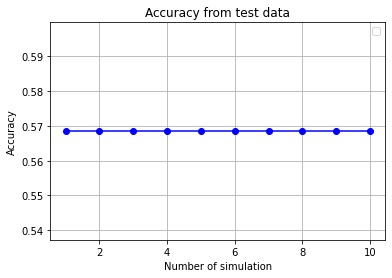

accuracy: 0.5685117967332124


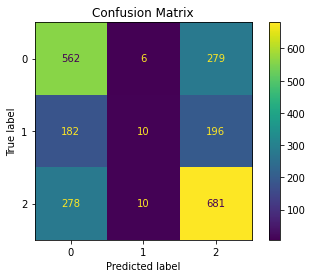

In [43]:
number_simulation_values = []
accuracy_values = []

for number_simulation in range(1, 11):
    model_knn = KNN(X_train, y_train, X_test, y_test, k_neighbors=216)
    accuracy = model_knn.build_and_train_model()
    number_simulation_values.append(number_simulation)
    accuracy_values.append(accuracy)

plt.plot(number_simulation_values, accuracy_values, 'bo-')
plt.title('Accuracy from test data')
plt.xlabel('Number of simulation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('KNN2.jpg')
plt.show()
print(f'accuracy: {accuracy}')

y_pred = model_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# Logistic Regression

In [44]:
class LR:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = None 

    def build_and_train_model(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model = LogisticRegression(random_state=42, multi_class='multinomial')
        model.fit(X_train, y_train)
        self.model = model
        accuracy = model.score(X_test, y_test)
        return accuracy
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

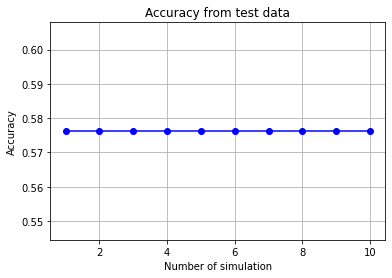

accuracy: 0.5762250453720508


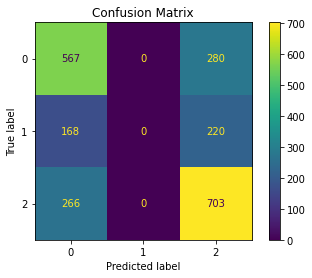

In [45]:
number_simulation_values = []
accuracy_values = []

for number_simulation in range(1, 11):
    model_LR = LR(X_train, y_train, X_test, y_test)
    accuracy = model_LR.build_and_train_model()
    number_simulation_values.append(number_simulation)
    accuracy_values.append(accuracy)

plt.plot(number_simulation_values, accuracy_values, 'bo-')
plt.title('Accuracy from test data')
plt.xlabel('Number of simulation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('LR.jpg')
plt.show()
print(f'accuracy: {accuracy}')

y_pred = model_LR.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

In [47]:
class NB:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = None 

    def build_and_train_model(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model = MultinomialNB()
        model.fit(X_train, y_train)
        self.model = model
        accuracy = model.score(X_test, y_test)
        return accuracy
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

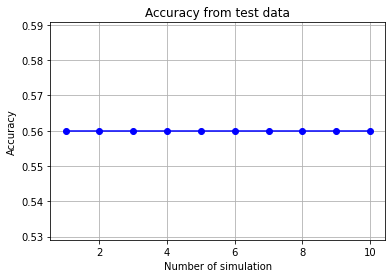

accuracy:0.5598911070780399


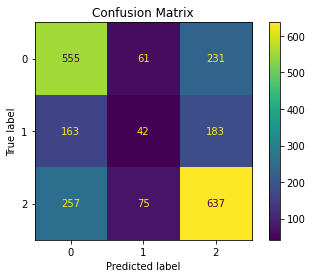

In [49]:
number_simulation_values = []
accuracy_values = []

for number_simulation in range(1, 11):
    model_NB = NB(X_train, y_train, X_test, y_test)
    accuracy = model_NB.build_and_train_model()
    number_simulation_values.append(number_simulation)
    accuracy_values.append(accuracy)

plt.plot(number_simulation_values, accuracy_values, 'bo-')
plt.title('Accuracy from test data')
plt.xlabel('Number of simulation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('NB.jpg')
plt.show()
print(f'accuracy:{accuracy}')

y_pred = model_NB.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# SVM

In [50]:
class SVM:
    def __init__(self, X_train, y_train, X_test, y_test, C):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.C = C
        self.model = None 
        
    def build_and_train_model(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model = SVC(C=self.C)
        model.fit(X_train, y_train)
        self.model = model
        accuracy = model.score(X_test, y_test)
        return accuracy
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

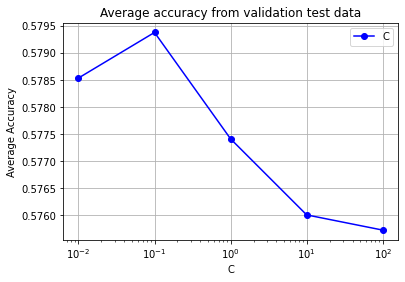

Best C from validation test data is: 0.1


In [36]:
C_values = [10**i for i in range(-2,3)]
C_list = []
average_accuracy_values = []

for k in C_values:
    accuracy_values_for_C = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_svm = SVM(X_validate, y_validate, X_test_validate, y_test_validate, C=k)
        accuracy = model_svm.build_and_train_model()
        accuracy_values_for_C.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_C)
    C_list.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(C_list, average_accuracy_values, 'bo-', label='C')
plt.title('Average accuracy from validation test data')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('SVM1.jpg')
plt.show()

best_C = C_list[np.argmax(average_accuracy_values)]
print(f"Best C from validation test data is: {best_C}")

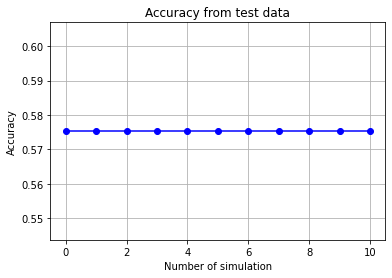

accuracy:0.5753176043557169


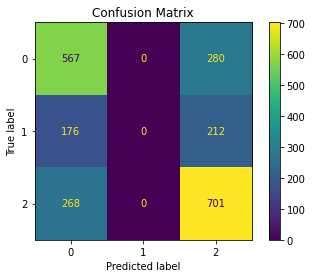

In [51]:
number_simulation_values = []
accuracy_values = []

for number_simulation in range(11):
    model_SVM = SVM(X_train, y_train, X_test, y_test, C=0.1)
    accuracy = model_SVM.build_and_train_model()
    number_simulation_values.append(number_simulation)
    accuracy_values.append(accuracy)

plt.plot(number_simulation_values, accuracy_values, 'bo-')
plt.title('Accuracy from test data')
plt.xlabel('Number of simulation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('SVM2.jpg')
plt.show()
print(f'accuracy:{accuracy}')

y_pred = model_SVM.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Classification Tree

In [38]:
class CT:
    def __init__(self, X_train, y_train, X_test, y_test, min_samples_split, min_samples_leaf):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.model = None 

    def build_and_train_model(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model = DecisionTreeClassifier(random_state=42, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        model.fit(X_train, y_train)
        self.model = model
        accuracy = model.score(X_test, y_test)
        return accuracy
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

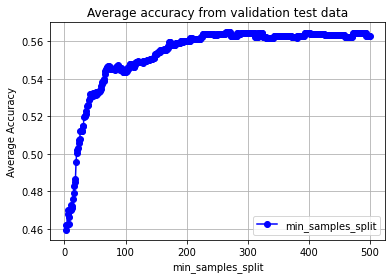

Best min_samples_split from validation test data is: 265


In [39]:
min_samples_split_values = [i for i in range(2,501)]
min_samples_split_list = []
average_accuracy_values = []

for k in min_samples_split_values:
    accuracy_values_for_min_samples_split_list = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_CT = CT(X_validate, y_validate, X_test_validate, y_test_validate, min_samples_split=k, min_samples_leaf=1)
        accuracy = model_CT.build_and_train_model()
        accuracy_values_for_min_samples_split_list.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_min_samples_split_list)
    min_samples_split_list.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(min_samples_split_list, average_accuracy_values, 'bo-', label='min_samples_split')
plt.title('Average accuracy from validation test data')
plt.xlabel('min_samples_split')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('CT1.jpg')
plt.show()

best_min_samples_split = min_samples_split_list[np.argmax(average_accuracy_values)]
print(f"Best min_samples_split from validation test data is: {best_min_samples_split}")

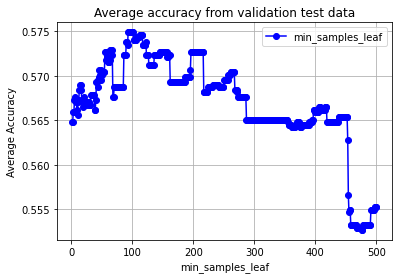

Best min_samples_leaf from validation test data is: 93


In [40]:
min_samples_leaf_values = [i for i in range(1,501)]
min_samples_leaf_list = []
average_accuracy_values = []

for k in min_samples_leaf_values:
    accuracy_values_for_min_samples_leaf_list = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_CT = CT(X_validate, y_validate, X_test_validate, y_test_validate, min_samples_split=265, min_samples_leaf=k)
        accuracy = model_CT.build_and_train_model()
        accuracy_values_for_min_samples_leaf_list.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_min_samples_leaf_list)
    min_samples_leaf_list.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(min_samples_leaf_list, average_accuracy_values, 'bo-', label='min_samples_leaf')
plt.title('Average accuracy from validation test data')
plt.xlabel('min_samples_leaf')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('CT2.jpg')
plt.show()

best_min_samples_leaf = min_samples_leaf_list[np.argmax(average_accuracy_values)]
print(f"Best min_samples_leaf from validation test data is: {best_min_samples_leaf}")

No handles with labels found to put in legend.


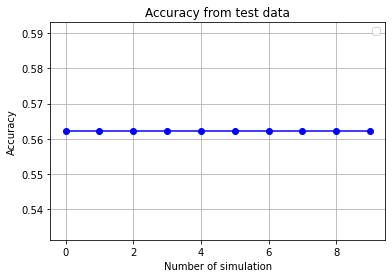

accuracy:0.5621597096188747


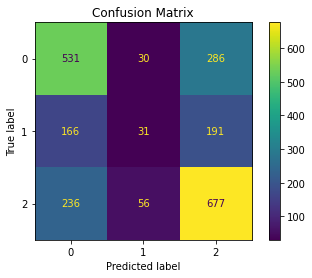

In [42]:
number_simulation_values = []
accuracy_values = []

for number_simulation in range(10):
    model_CT = CT(X_train, y_train, X_test, y_test, min_samples_split=265, min_samples_leaf=93)
    accuracy = model_CT.build_and_train_model()
    number_simulation_values.append(number_simulation)
    accuracy_values.append(accuracy)

plt.plot(number_simulation_values, accuracy_values, 'bo-')
plt.title('Accuracy from test data')
plt.xlabel('Number of simulation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('CT3.jpg')
plt.show()
print(f'accuracy:{accuracy}')

y_pred = model_CT.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [8]:
class RF:
    def __init__(self, X_train, y_train, X_test, y_test, n_estimators, min_samples_split, min_samples_leaf):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def build_and_train_model(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model = RandomForestClassifier(random_state=42, n_estimators=self.n_estimators, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        model.fit(X_train, y_train)
        self.model = model
        accuracy = model.score(X_test, y_test)
        return accuracy
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

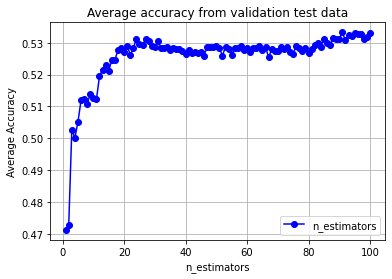

Best n_estimators from validation test data is: 91


In [44]:
n_estimators_values = [i for i in range(1,101)]
n_estimators_list = []
average_accuracy_values = []

for k in n_estimators_values:
    accuracy_values_for_n_estimators_list = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_RF = RF(X_validate, y_validate, X_test_validate, y_test_validate, n_estimators=k, min_samples_split=2, min_samples_leaf=1)
        accuracy = model_RF.build_and_train_model()
        accuracy_values_for_n_estimators_list.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_n_estimators_list)
    n_estimators_list.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(n_estimators_list, average_accuracy_values, 'bo-', label='n_estimators')
plt.title('Average accuracy from validation test data')
plt.xlabel('n_estimators')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('RF1.jpg')
plt.show()

best_n_estimators = n_estimators_list[np.argmax(average_accuracy_values)]
print(f"Best n_estimators from validation test data is: {best_n_estimators}")

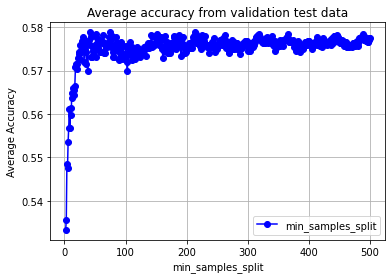

Best min_samples_split from validation test data is: 41


In [45]:
min_samples_split_values = [i for i in range(2,501)]
min_samples_split_list = []
average_accuracy_values = []

for k in min_samples_split_values:
    accuracy_values_for_min_samples_split_list = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_RF = RF(X_validate, y_validate, X_test_validate, y_test_validate, n_estimators=91, min_samples_split=k, min_samples_leaf=1)
        accuracy = model_RF.build_and_train_model()
        accuracy_values_for_min_samples_split_list.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_min_samples_split_list)
    min_samples_split_list.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(min_samples_split_list, average_accuracy_values, 'bo-', label='min_samples_split')
plt.title('Average accuracy from validation test data')
plt.xlabel('min_samples_split')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('RF2.jpg')
plt.show()

best_min_samples_split = min_samples_split_list[np.argmax(average_accuracy_values)]
print(f"Best min_samples_split from validation test data is: {best_min_samples_split}")

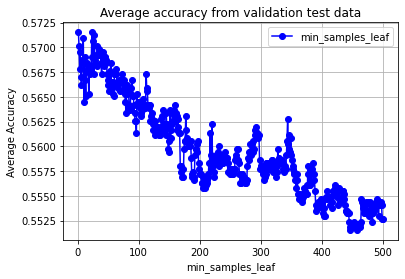

Best min_samples_leaf from validation test data is: 1


In [10]:
min_samples_leaf_values = [i for i in range(1,501)]
min_samples_leaf_list = []
average_accuracy_values = []

for k in min_samples_leaf_values:
    accuracy_values_for_min_samples_leaf_list = []
    for number_simulation in range(10):
        X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
        model_RF = RF(X_validate, y_validate, X_test_validate, y_test_validate, n_estimators=91, min_samples_split=41, min_samples_leaf=k)
        accuracy = model_RF.build_and_train_model()
        accuracy_values_for_min_samples_leaf_list.append(accuracy)
    average_accuracy = np.mean(accuracy_values_for_min_samples_leaf_list)
    min_samples_leaf_list.append(k)
    average_accuracy_values.append(average_accuracy)

plt.plot(min_samples_leaf_list, average_accuracy_values, 'bo-', label='min_samples_leaf')
plt.title('Average accuracy from validation test data')
plt.xlabel('min_samples_leaf')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('RF.jpg')
plt.show()

best_min_samples_leaf = min_samples_leaf_list[np.argmax(average_accuracy_values)]
print(f"Best min_samples_leaf from validation test data is: {best_min_samples_leaf}")

No handles with labels found to put in legend.


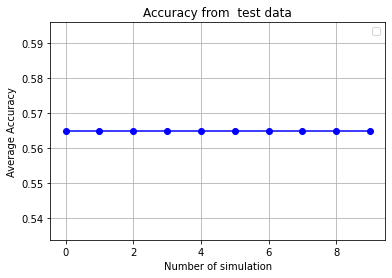

accuracy:0.5648820326678766


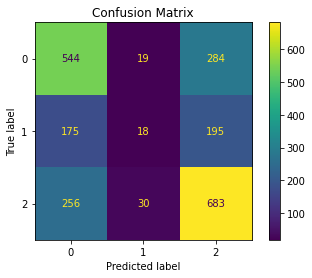

In [82]:
number_simulation_values = []
accuracy_values = []

for number_simulation in range(10):
    model_RF = RF(X_train, y_train, X_test, y_test, n_estimators=91, min_samples_split=41, min_samples_leaf=1)
    accuracy = model_RF.build_and_train_model()
    number_simulation_values.append(number_simulation)
    accuracy_values.append(accuracy)

plt.plot(number_simulation_values, accuracy_values, 'bo-')
plt.title('Accuracy from  test data')
plt.xlabel('Number of simulation')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('RF4.jpg')
plt.show()
print(f'accuracy:{accuracy}')

y_pred = model_RF.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Bagging

In [74]:
class Bagging:
    def __init__(self, X_train, y_train, X_test, y_test, base_model, n_estimators):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.base_model = base_model
        self.n_estimators = n_estimators

    def build_and_train_model(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        base_model = self.base_model
        if model_type == 'k-NN':
            base_model = KNeighborsClassifier(n_neighbors=216)
        elif model_type == 'Logistic regression':
            base_model = LogisticRegression(random_state=42, multi_class='multinomial')              
        elif model_type == 'Naive Bayes':
            base_model = MultinomialNB()
        elif model_type == 'SVM':
            base_model = SVC(C=0.1)
        elif model_type == 'Classification tree':
            base_model = DecisionTreeClassifier(random_state=42, min_samples_split=265, min_samples_leaf=93)
        elif model_type == 'Random forest':
            base_model = RandomForestClassifier(random_state=42, n_estimators=91, min_samples_split=41, min_samples_leaf=1)
        else:
            raise ValueError("Invalid model type. Choose 'knn', 'logistic_regression', 'naive_bayes', 'svm', 'classification_tree' or 'random_forest'.")
        model = BaggingClassifier(base_model, random_state=42, n_estimators=self.n_estimators)
        model.fit(X_train, y_train)
        self.model = model
        accuracy = model.score(X_test, y_test)
        return accuracy
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")
        return self.model.predict(X)

k-NN  (best n_estimators=10) accuracy:[0.5707803992740472, 0.5676043557168784, 0.5694192377495463, 0.5676043557168784, 0.5712341197822142, 0.5716878402903811, 0.5698729582577132, 0.5694192377495463, 0.5707803992740472, 0.5648820326678766]
Logistic regression  (best n_estimators=10) accuracy:[0.5762250453720508, 0.5766787658802178, 0.5766787658802178, 0.5766787658802178, 0.5757713248638838, 0.5766787658802178, 0.5766787658802178, 0.5762250453720508, 0.5766787658802178, 0.5766787658802178]
Naive Bayes  (best n_estimators=3) accuracy:[0.558983666061706, 0.558983666061706, 0.558983666061706, 0.558983666061706, 0.558529945553539, 0.558983666061706, 0.558529945553539, 0.558983666061706, 0.558529945553539, 0.558529945553539]
SVM  (best n_estimators=10) accuracy:[0.5771324863883848, 0.5757713248638838, 0.5762250453720508, 0.5762250453720508, 0.5757713248638838, 0.5753176043557169, 0.5753176043557169, 0.5762250453720508, 0.5757713248638838, 0.5739564428312159]
Classification tree  (best n_estim

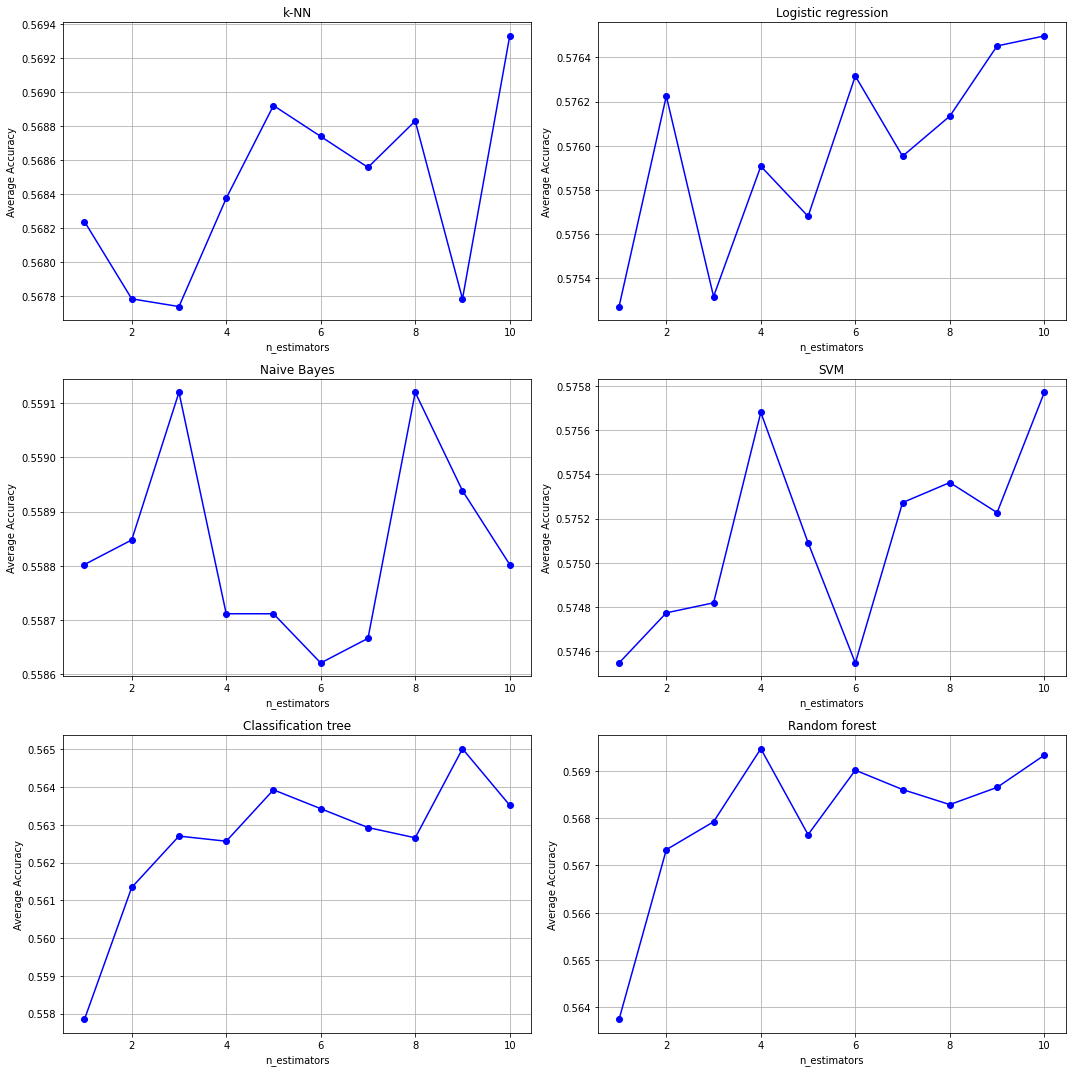

In [76]:
models = {
    'k-NN': KNeighborsClassifier(n_neighbors=216),
    'Logistic regression': LogisticRegression(random_state=42, multi_class='multinomial'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(C=0.1),
    'Classification tree': DecisionTreeClassifier(random_state=42, min_samples_split=265, min_samples_leaf=93),
    'Random forest': RandomForestClassifier(random_state=42, n_estimators=91, min_samples_split=41, min_samples_leaf=1)
}

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, (model_type, base_model) in enumerate(models.items()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    n_estimators_values = range(1, 11)
    average_accuracy_values = []
    best_n_estimators_list = []

    for n_estimators in n_estimators_values:
        accuracy_values_for_n_estimators_list = []      
        for i in range(10):
            X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2)
            bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators)
            bagging_model.fit(X_train, y_train)
            accuracy = bagging_model.score(X_test, y_test)
            accuracy_values_for_n_estimators_list.append(accuracy)
        average_accuracy = np.mean(accuracy_values_for_n_estimators_list)
        average_accuracy_values.append(average_accuracy)
        best_n_estimators = n_estimators_values[np.argmax(average_accuracy_values)]
        best_n_estimators_list.append(best_n_estimators)

    ax.plot(n_estimators_values, average_accuracy_values, 'bo-')
    ax.set_title(model_type)
    print(model_type, f" (best n_estimators={best_n_estimators_list[-1]})", f"accuracy:{accuracy_values_for_n_estimators_list}")
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('Average Accuracy')
    ax.grid(True)

plt.tight_layout()
plt.savefig('Bagging1.jpg')
plt.show()

k-NN accuracy: [0.5644283121597096, 0.5716878402903811, 0.5648820326678766, 0.5753176043557169, 0.5716878402903811, 0.5694192377495463, 0.5689655172413793, 0.5657894736842105, 0.5698729582577132, 0.5653357531760436]
Logistic regression accuracy: [0.5766787658802178, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5766787658802178, 0.5753176043557169, 0.5766787658802178, 0.5748638838475499, 0.5766787658802178]


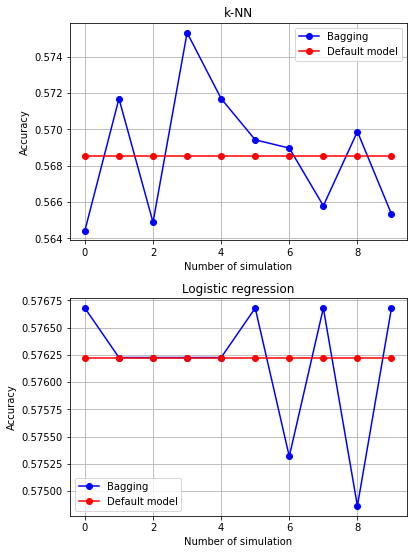

In [41]:
models = {
    'k-NN': (KNeighborsClassifier(n_neighbors=216), 1),
    'Logistic regression': (LogisticRegression(random_state=42, multi_class='multinomial'), 6)
}

fig, axs = plt.subplots(2, 1, figsize=(5.85, 7.8))

for i, (model_type, (base_model, n_estimators)) in enumerate(models.items()):
    ax = axs[i] 
    accuracy_values_for_n_simulations_list = []
    number_simulations_list = []
    for j in range(10):
        bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators)
        bagging_model.fit(X_train, y_train)
        accuracy = bagging_model.score(X_test, y_test)
        number_simulations_list.append(j)
        accuracy_values_for_n_simulations_list.append(accuracy)
    ax.plot(number_simulations_list, accuracy_values_for_n_simulations_list, 'bo-', label='Bagging')
    
    base_model.fit(X_train, y_train)
    accuracy = base_model.score(X_test, y_test)
    ax.plot(number_simulations_list, [accuracy] * len(number_simulations_list), 'ro-', label='Default model')
    
    ax.set_title(model_type)
    print(model_type, f"accuracy: {accuracy_values_for_n_simulations_list}")
    ax.set_xlabel('Number of simulation')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('Bagging21.jpg')
plt.show()

Naive Bayes accuracy: [0.559437386569873, 0.5603448275862069, 0.559437386569873, 0.5598911070780399, 0.5598911070780399, 0.5598911070780399, 0.5607985480943739, 0.559437386569873, 0.5598911070780399, 0.5598911070780399]
SVM accuracy: [0.574410163339383, 0.5757713248638838, 0.5757713248638838, 0.5757713248638838, 0.5762250453720508, 0.5757713248638838, 0.5757713248638838, 0.5725952813067151, 0.5753176043557169, 0.5753176043557169]


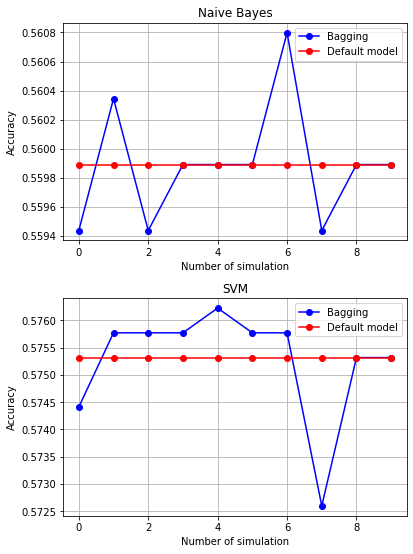

In [42]:
models = {
    'Naive Bayes': (MultinomialNB(), 3),
    'SVM': (SVC(C=0.1), 6)
}

fig, axs = plt.subplots(2, 1, figsize=(5.85, 7.8))

for i, (model_type, (base_model, n_estimators)) in enumerate(models.items()):
    ax = axs[i] 
    accuracy_values_for_n_simulations_list = []
    number_simulations_list = []
    for j in range(10):
        bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators)
        bagging_model.fit(X_train, y_train)
        accuracy = bagging_model.score(X_test, y_test)
        number_simulations_list.append(j)
        accuracy_values_for_n_simulations_list.append(accuracy)
    ax.plot(number_simulations_list, accuracy_values_for_n_simulations_list, 'bo-', label='Bagging')
    
    base_model.fit(X_train, y_train)
    accuracy = base_model.score(X_test, y_test)
    ax.plot(number_simulations_list, [accuracy] * len(number_simulations_list), 'ro-', label='Default model')
    
    ax.set_title(model_type)
    print(model_type, f"accuracy: {accuracy_values_for_n_simulations_list}")
    ax.set_xlabel('Number of simulation')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('Bagging22.jpg')
plt.show()

Classification tree accuracy: [0.5612522686025408, 0.5671506352087115, 0.558076225045372, 0.5558076225045372, 0.558076225045372, 0.5666969147005445, 0.5639745916515426, 0.5621597096188747, 0.5576225045372051, 0.5603448275862069]
Random forest accuracy: [0.5680580762250453, 0.5666969147005445, 0.5707803992740472, 0.5694192377495463, 0.5694192377495463, 0.5666969147005445, 0.5689655172413793, 0.5725952813067151, 0.572141560798548, 0.5680580762250453]


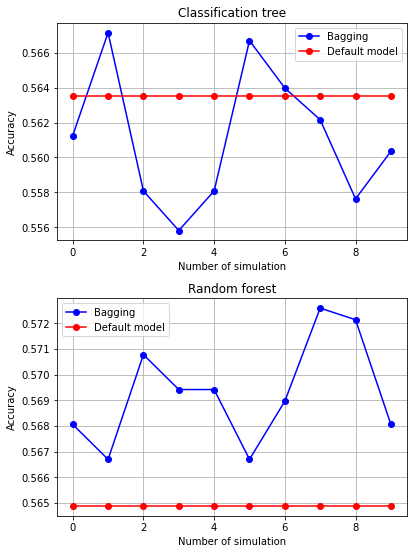

In [43]:
models = {
    'Classification tree': (DecisionTreeClassifier(random_state=42, min_samples_split=265, min_samples_leaf=93), 5),
    'Random forest': (RandomForestClassifier(random_state=42, n_estimators=91, min_samples_split=41, min_samples_leaf=1), 9)
}

fig, axs = plt.subplots(2, 1, figsize=(5.85, 7.8))

for i, (model_type, (base_model, n_estimators)) in enumerate(models.items()):
    ax = axs[i] 
    accuracy_values_for_n_simulations_list = []
    number_simulations_list = []
    for j in range(10):
        bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators)
        bagging_model.fit(X_train, y_train)
        accuracy = bagging_model.score(X_test, y_test)
        number_simulations_list.append(j)
        accuracy_values_for_n_simulations_list.append(accuracy)
    ax.plot(number_simulations_list, accuracy_values_for_n_simulations_list, 'bo-', label='Bagging')
    
    base_model.fit(X_train, y_train)
    accuracy = base_model.score(X_test, y_test)
    ax.plot(number_simulations_list, [accuracy] * len(number_simulations_list), 'ro-', label='Default model')
    
    ax.set_title(model_type)
    print(model_type, f"accuracy: {accuracy_values_for_n_simulations_list}")
    ax.set_xlabel('Number of simulation')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('Bagging23.jpg')
plt.show()

# Boosting

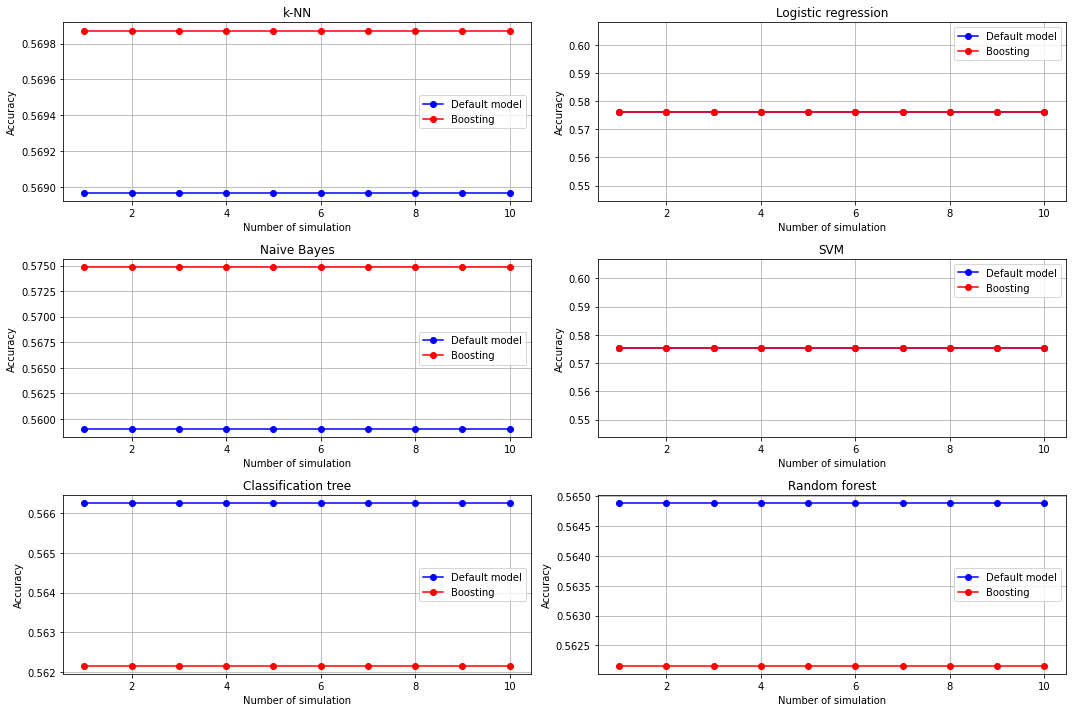

k-NN: [0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132, 0.5698729582577132]
Logistic regression: [0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508]
Naive Bayes: [0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499]
SVM: [0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169]
Classification tree: [0.5621597096188747, 0.5621597096188747, 0.5621597096188747, 0.5621597096188747, 0.5621597096188747, 0.5621597096188747, 0.5621597

In [86]:
parameters = {
    'objective': 'multi:softmax',
    'num_class': 3
}


knn_accuracies = []
xgb_accuracies_00 = []
lr_accuracies = []
xgb_accuracies_01 = []
nb_accuracies = []
xgb_accuracies_10 = []
svm_accuracies = []
xgb_accuracies_11 = []
ct_accuracies = []
xgb_accuracies_20 = []
rf_accuracies = []
xgb_accuracies_21 = []


for j in range(10):
    knn_model = KNeighborsClassifier(n_neighbors=216)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_accuracies.append(knn_accuracy)

    xgb_model_knn = xgb.train(parameters, xgb.DMatrix(knn_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_knn = xgb.DMatrix(knn_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_knn = xgb_model_knn.predict(dtest_knn)
    xgb_accuracy_knn = accuracy_score(y_test, xgb_predictions_knn)
    xgb_accuracies_00.append(xgb_accuracy_knn)

    lr_model = LogisticRegression(random_state=42, multi_class='multinomial')
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    lr_accuracies.append(lr_accuracy)

    xgb_model_lr = xgb.train(parameters, xgb.DMatrix(lr_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_lr = xgb.DMatrix(lr_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_lr = xgb_model_lr.predict(dtest_lr)
    xgb_accuracy_lr = accuracy_score(y_test, xgb_predictions_lr)
    xgb_accuracies_01.append(xgb_accuracy_lr) 

    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    nb_accuracies.append(nb_accuracy)

    xgb_model_nb = xgb.train(parameters, xgb.DMatrix(nb_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_nb = xgb.DMatrix(nb_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_nb = xgb_model_nb.predict(dtest_nb)
    xgb_accuracy_nb = accuracy_score(y_test, xgb_predictions_nb)
    xgb_accuracies_10.append(xgb_accuracy_nb) 

    svm_model = SVC(C=0.1)
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_accuracies.append(svm_accuracy)

    xgb_model_svm = xgb.train(parameters, xgb.DMatrix(svm_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_svm = xgb.DMatrix(svm_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_svm = xgb_model_svm.predict(dtest_svm)
    xgb_accuracy_svm = accuracy_score(y_test, xgb_predictions_svm)
    xgb_accuracies_11.append(xgb_accuracy_svm)

    ct_model = DecisionTreeClassifier(random_state=42, min_samples_split=265, min_samples_leaf=93)
    ct_model.fit(X_train, y_train)
    ct_predictions = ct_model.predict(X_test)
    ct_accuracy = accuracy_score(y_test, ct_predictions)
    ct_accuracies.append(ct_accuracy)

    xgb_model_ct = xgb.train(parameters, xgb.DMatrix(ct_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_ct = xgb.DMatrix(ct_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_ct = xgb_model_svm.predict(dtest_ct)
    xgb_accuracy_ct = accuracy_score(y_test, xgb_predictions_ct)
    xgb_accuracies_20.append(xgb_accuracy_ct)

    rf_model = RandomForestClassifier(random_state=42, n_estimators=91, min_samples_split=41, min_samples_leaf=1)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_accuracies.append(rf_accuracy)

    xgb_model_rf = xgb.train(parameters, xgb.DMatrix(ct_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_rf = xgb.DMatrix(ct_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_rf = xgb_model_svm.predict(dtest_rf)
    xgb_accuracy_rf = accuracy_score(y_test, xgb_predictions_rf)
    xgb_accuracies_21.append(xgb_accuracy_rf)
        
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].plot(range(1,11), knn_accuracies, 'bo-', label='Default model')
axes[0, 0].plot(range(1,11), xgb_accuracies_00, 'ro-', label='Boosting')
axes[0, 0].set_title('k-NN')
axes[0, 0].set_xlabel('Number of simulation')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(range(1,11), lr_accuracies, 'bo-', label='Default model')
axes[0, 1].plot(range(1,11), xgb_accuracies_01, 'ro-', label='Boosting')
axes[0, 1].set_title('Logistic regression')
axes[0, 1].set_xlabel('Number of simulation')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(range(1,11), nb_accuracies, 'bo-', label='Default model')
axes[1, 0].plot(range(1,11), xgb_accuracies_10, 'ro-', label='Boosting')
axes[1, 0].set_title('Naive Bayes')
axes[1, 0].set_xlabel('Number of simulation')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(range(1,11), svm_accuracies, 'bo-', label='Default model')
axes[1, 1].plot(range(1,11), xgb_accuracies_11, 'ro-', label='Boosting')
axes[1, 1].set_title('SVM')
axes[1, 1].set_xlabel('Number of simulation')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)

axes[2, 0].plot(range(1,11), ct_accuracies, 'bo-', label='Default model')
axes[2, 0].plot(range(1,11), xgb_accuracies_20, 'ro-', label='Boosting')
axes[2, 0].set_title('Classification tree')
axes[2, 0].set_xlabel('Number of simulation')
axes[2, 0].set_ylabel('Accuracy')
axes[2, 0].legend()
axes[2, 0].grid(True)

axes[2, 1].plot(range(1,11), rf_accuracies, 'bo-', label='Default model')
axes[2, 1].plot(range(1,11), xgb_accuracies_21, 'ro-', label='Boosting')
axes[2, 1].set_title('Random forest')
axes[2, 1].set_xlabel('Number of simulation')
axes[2, 1].set_ylabel('Accuracy')
axes[2, 1].legend()
axes[2, 1].grid(True)

plt.tight_layout()
plt.savefig('Boosting.jpg')
plt.show()

print(f"k-NN: {xgb_accuracies_00}")
print(f"Logistic regression: {xgb_accuracies_01}")
print(f"Naive Bayes: {xgb_accuracies_10}")
print(f"SVM: {xgb_accuracies_11}")
print(f"Classification tree: {xgb_accuracies_20}")
print(f"Random forest: {xgb_accuracies_21}")

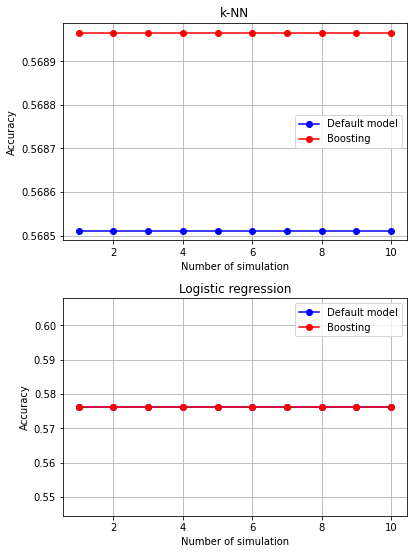

k-NN: [0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793, 0.5689655172413793]
Logistic regression: [0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508, 0.5762250453720508]


In [44]:
parameters = {
    'objective': 'multi:softmax',
    'num_class': 3
}

knn_accuracies = []
xgb_accuracies_00 = []
lr_accuracies = []
xgb_accuracies_01 = []

for j in range(10):
    knn_model = KNeighborsClassifier(n_neighbors=216)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_accuracies.append(knn_accuracy)

    xgb_model_knn = xgb.train(parameters, xgb.DMatrix(knn_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_knn = xgb.DMatrix(knn_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_knn = xgb_model_knn.predict(dtest_knn)
    xgb_accuracy_knn = accuracy_score(y_test, xgb_predictions_knn)
    xgb_accuracies_00.append(xgb_accuracy_knn)

    lr_model = LogisticRegression(random_state=42, multi_class='multinomial')
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    lr_accuracies.append(lr_accuracy)

    xgb_model_lr = xgb.train(parameters, xgb.DMatrix(lr_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_lr = xgb.DMatrix(lr_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_lr = xgb_model_lr.predict(dtest_lr)
    xgb_accuracy_lr = accuracy_score(y_test, xgb_predictions_lr)
    xgb_accuracies_01.append(xgb_accuracy_lr) 

fig, axes = plt.subplots(2, 1, figsize=(5.85, 7.8))
    
axes[0].plot(range(1,11), knn_accuracies, 'bo-', label='Default model')
axes[0].plot(range(1,11), xgb_accuracies_00, 'ro-', label='Boosting')
axes[0].set_title('k-NN')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1,11), lr_accuracies, 'bo-', label='Default model')
axes[1].plot(range(1,11), xgb_accuracies_01, 'ro-', label='Boosting')
axes[1].set_title('Logistic regression')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('Boosting1.jpg')
plt.show()

print(f"k-NN: {xgb_accuracies_00}")
print(f"Logistic regression: {xgb_accuracies_01}")

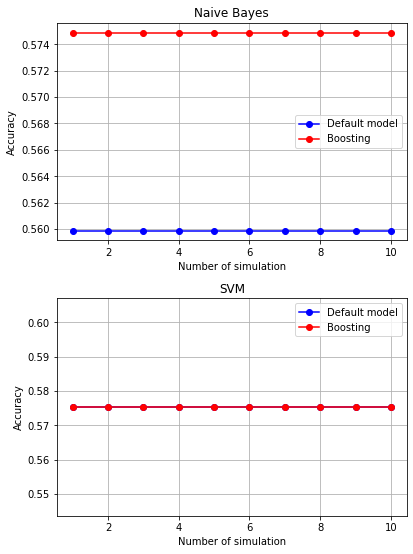

Naive Bayes: [0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499, 0.5748638838475499]
SVM: [0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169, 0.5753176043557169]


In [45]:
parameters = {
    'objective': 'multi:softmax',
    'num_class': 3
}

nb_accuracies = []
xgb_accuracies_10 = []
svm_accuracies = []
xgb_accuracies_11 = []

for j in range(10):
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    nb_accuracies.append(nb_accuracy)

    xgb_model_nb = xgb.train(parameters, xgb.DMatrix(nb_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_nb = xgb.DMatrix(nb_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_nb = xgb_model_nb.predict(dtest_nb)
    xgb_accuracy_nb = accuracy_score(y_test, xgb_predictions_nb)
    xgb_accuracies_10.append(xgb_accuracy_nb) 

    svm_model = SVC(C=0.1)
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_accuracies.append(svm_accuracy)

    xgb_model_svm = xgb.train(parameters, xgb.DMatrix(svm_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_svm = xgb.DMatrix(svm_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_svm = xgb_model_svm.predict(dtest_svm)
    xgb_accuracy_svm = accuracy_score(y_test, xgb_predictions_svm)
    xgb_accuracies_11.append(xgb_accuracy_svm)

fig, axes = plt.subplots(2, 1, figsize=(5.85, 7.8))
    
axes[0].plot(range(1,11), nb_accuracies, 'bo-', label='Default model')
axes[0].plot(range(1,11), xgb_accuracies_10, 'ro-', label='Boosting')
axes[0].set_title('Naive Bayes')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1,11), svm_accuracies, 'bo-', label='Default model')
axes[1].plot(range(1,11), xgb_accuracies_11, 'ro-', label='Boosting')
axes[1].set_title('SVM')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('Boosting2.jpg')
plt.show()

print(f"Naive Bayes: {xgb_accuracies_10}")
print(f"SVM: {xgb_accuracies_11}")

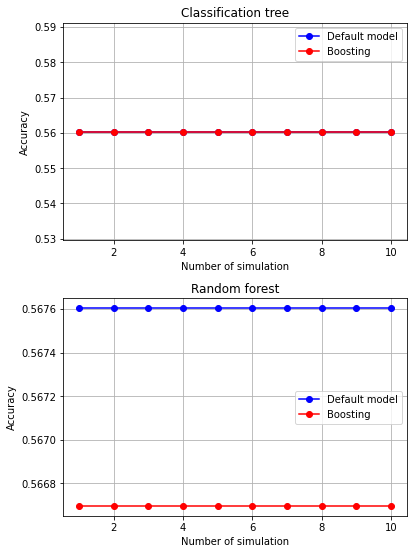

Classification tree: [0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069, 0.5603448275862069]
Random forest: [0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445, 0.5666969147005445]


In [55]:
parameters = {
    'objective': 'multi:softmax',
    'num_class': 3
}

ct_accuracies = []
xgb_accuracies_20 = []
rf_accuracies = []
xgb_accuracies_21 = []

for j in range(10):
    ct_model = DecisionTreeClassifier(random_state=42, min_samples_split=288, min_samples_leaf=233)
    ct_model.fit(X_train, y_train)
    ct_predictions = ct_model.predict(X_test)
    ct_accuracy = accuracy_score(y_test, ct_predictions)
    ct_accuracies.append(ct_accuracy)

    xgb_model_ct = xgb.train(parameters, xgb.DMatrix(ct_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_ct = xgb.DMatrix(ct_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_ct = xgb_model_svm.predict(dtest_ct)
    xgb_accuracy_ct = accuracy_score(y_test, xgb_predictions_ct)
    xgb_accuracies_20.append(xgb_accuracy_ct)

    rf_model = RandomForestClassifier(random_state=42, n_estimators=77, min_samples_split=152, min_samples_leaf=1)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_accuracies.append(rf_accuracy)

    xgb_model_rf = xgb.train(parameters, xgb.DMatrix(rf_predictions.reshape(-1, 1), label=y_test), num_boost_round=3)
    dtest_rf = xgb.DMatrix(rf_model.predict(X_test).reshape(-1, 1), label=y_test)
    xgb_predictions_rf = xgb_model_svm.predict(dtest_rf)
    xgb_accuracy_rf = accuracy_score(y_test, xgb_predictions_rf)
    xgb_accuracies_21.append(xgb_accuracy_rf)

fig, axes = plt.subplots(2, 1, figsize=(5.85, 7.8))
    
axes[0].plot(range(1,11), ct_accuracies, 'bo-', label='Default model')
axes[0].plot(range(1,11), xgb_accuracies_20, 'ro-', label='Boosting')
axes[0].set_title('Classification tree')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1,11), rf_accuracies, 'bo-', label='Default model')
axes[1].plot(range(1,11), xgb_accuracies_21, 'ro-', label='Boosting')
axes[1].set_title('Random forest')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('Boosting3.jpg')
plt.show()

print(f"Classification tree: {xgb_accuracies_20}")
print(f"Random forest: {xgb_accuracies_21}")

# Neural network

In [88]:
X_validate = np.array(X_validate)
X_test_validate = np.array(X_test_validate)
y_validate_categorical = to_categorical(y_validate)
y_test_validate_categorical = to_categorical(y_test_validate)

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.9417 - accuracy: 0.3356
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.6238 - accuracy: 0.4418
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.5105 - accuracy: 0.4652
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4502 - accuracy: 0.4823
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4052 - accuracy: 0.4877
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3754 - accuracy: 0.4941
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3546 - accuracy: 0.4896
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3343 - accuracy: 0.4899
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3103 - accuracy: 0.5054
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.2460 - accuracy: 0.5763

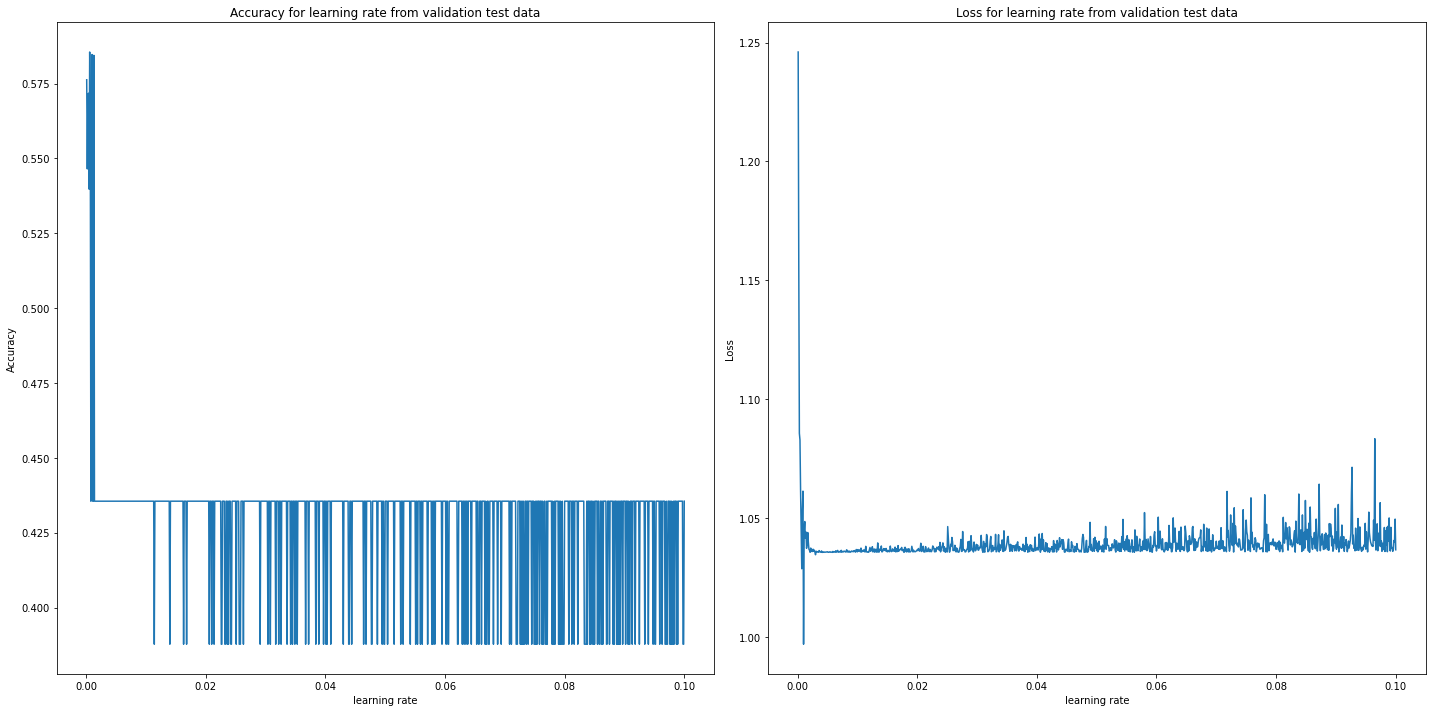

Best learning_rate: 0.0006
Best loss: 1.0467002391815186
Best accuracy: 0.585557758808136


In [89]:
custom_lr = [i/10000 for i in range(1, 1001)]
loss_list = []
accuracy_list = []

for j in custom_lr:
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.05))
    model.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.02))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=j)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(custom_lr, accuracy_list)
axes[0].set_title('Accuracy for learning rate from validation test data')
axes[0].set_xlabel('learning rate')
axes[0].set_ylabel('Accuracy')

axes[1].plot(custom_lr, loss_list)
axes[1].set_title('Loss for learning rate from validation test data')
axes[1].set_xlabel('learning rate')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show() 

full_custom_lr = list(zip(loss_list, accuracy_list))
full_custom_lr = np.array(full_custom_lr) 

best_accuracy_indices = np.where(full_custom_lr[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_custom_lr[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_custom_lr[best_index, 0]
best_accuracy = full_custom_lr[best_index, 1]
best_learning_rate = custom_lr[best_index]
print(f'Best learning_rate: {best_learning_rate}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.2387 - accuracy: 0.4073
Epoch 2/10
445/445 [==============================] - 1s 1ms/step - loss: 1.1190 - accuracy: 0.4301
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0717 - accuracy: 0.4846
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0112 - accuracy: 0.5617
Epoch 5/10
445/445 [==============================] - 1s 1ms/step - loss: 0.9884 - accuracy: 0.5708
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 0.9799 - accuracy: 0.5705
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 0.9766 - accuracy: 0.5713
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 0.9734 - accuracy: 0.5699
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 0.9699 - accuracy: 0.5722
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 0.9608 - accuracy: 0.5799

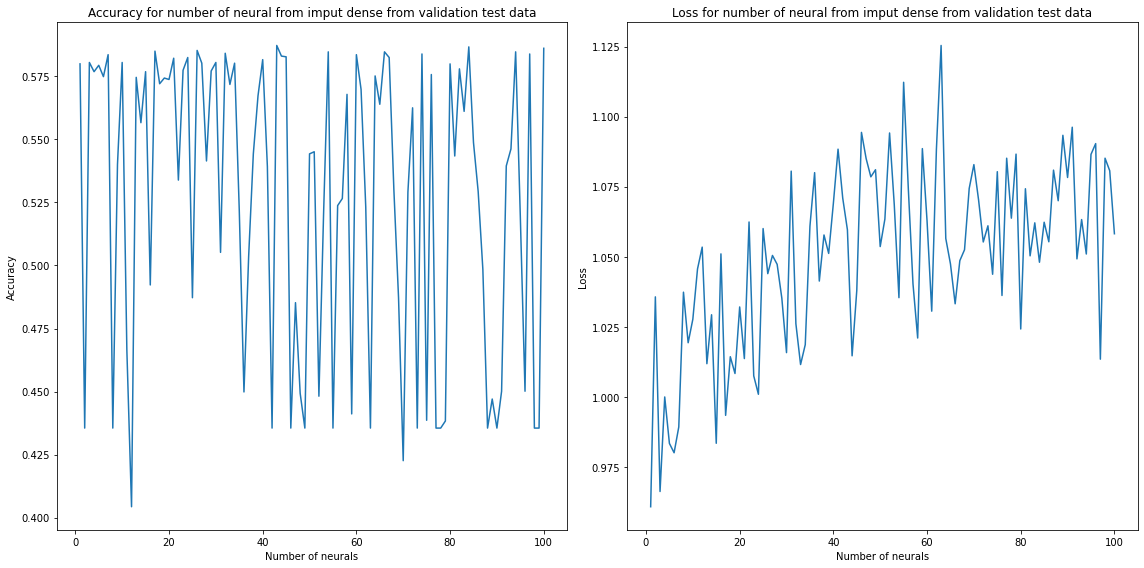

Best Number of neurons: 43
Best loss: 1.0596131086349487
Best accuracy: 0.5872436165809631


In [90]:
layer1_neuron = [i for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in layer1_neuron:
    model = Sequential()
    model.add(Dense(j, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.05))
    model.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.02))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(layer1_neuron, accuracy_list)
axes[0].set_title('Accuracy for number of neural from imput dense from validation test data')
axes[0].set_xlabel('Number of neurals')
axes[0].set_ylabel('Accuracy')

axes[1].plot(layer1_neuron, loss_list)
axes[1].set_title('Loss for number of neural from imput dense from validation test data')
axes[1].set_xlabel('Number of neurals')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN2.jpg')
plt.show()

full_layer1_neuron = list(zip(loss_list, accuracy_list))
full_layer1_neuron = np.array(full_layer1_neuron) 

best_accuracy_indices = np.where(full_layer1_neuron[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_layer1_neuron[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_layer1_neuron[best_index, 0]
best_accuracy = full_layer1_neuron[best_index, 1]
best_number_neuron = layer1_neuron[best_index]
print(f'Best Number of neurons: {best_number_neuron}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4321 - accuracy: 0.4595
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2081 - accuracy: 0.5014
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1415 - accuracy: 0.5186
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1216 - accuracy: 0.5098
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0981 - accuracy: 0.5133
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0900 - accuracy: 0.5070
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0720 - accuracy: 0.5228
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0763 - accuracy: 0.4960
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0569 - accuracy: 0.5289
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.0355 - accuracy: 0.5308

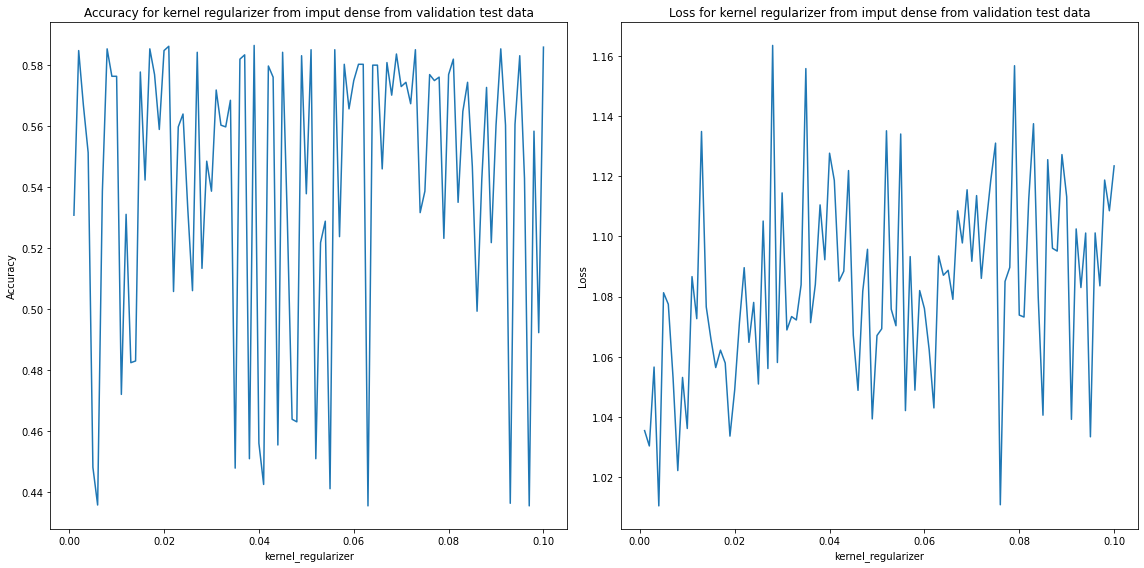

Best kernel_regularizer: 0.039
Best loss: 1.0922727584838867
Best accuracy: 0.5864006876945496


In [93]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(j)))
    model.add(Dropout(0.05))
    model.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.02))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from imput dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from imput dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN3.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.7069 - accuracy: 0.4027
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4467 - accuracy: 0.4443
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3668 - accuracy: 0.4450
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3101 - accuracy: 0.4573
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2706 - accuracy: 0.4641
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2381 - accuracy: 0.4676
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2119 - accuracy: 0.4775
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1878 - accuracy: 0.4872
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1683 - accuracy: 0.4922
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.1586 - accuracy: 0.4838

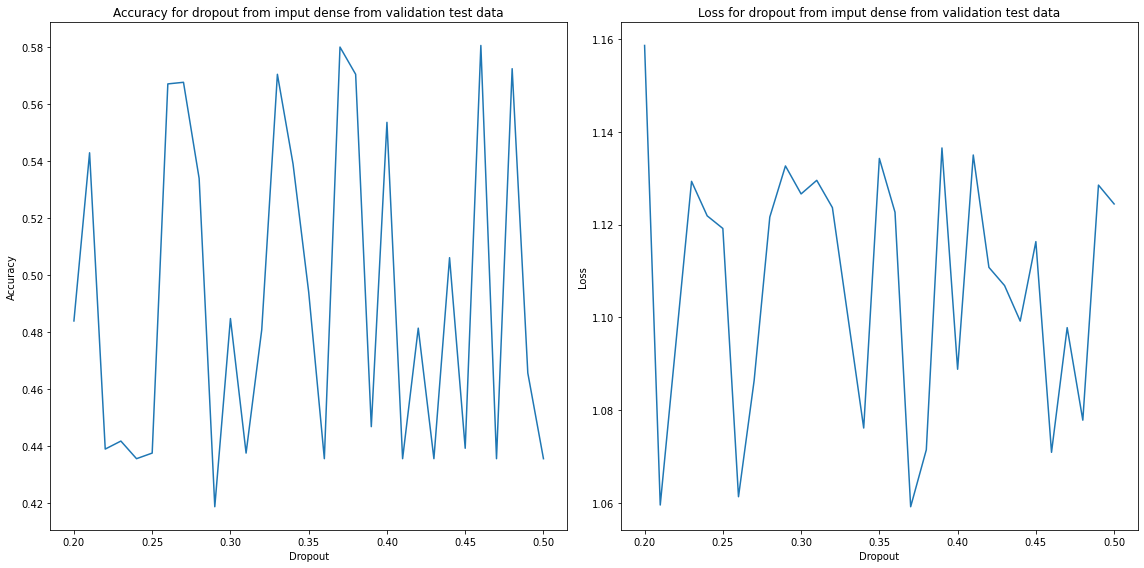

Best Dropout: 0.46
Best loss: 1.0709410905838013
Best accuracy: 0.5805001258850098


In [96]:
Dropout_list = [i/100 for i in range(20, 51)]
loss_list = []
accuracy_list = []

for j in Dropout_list:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(j))
    model.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.02))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(Dropout_list, accuracy_list)
axes[0].set_title('Accuracy for dropout from imput dense from validation test data')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Accuracy')

axes[1].plot(Dropout_list, loss_list)
axes[1].set_title('Loss for dropout from imput dense from validation test data')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN4.jpg')
plt.show() 

full_Dropout_list = list(zip(loss_list, accuracy_list))
full_Dropout_list = np.array(full_Dropout_list) 

best_accuracy_indices = np.where(full_Dropout_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_Dropout_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_Dropout_list[best_index, 0]
best_accuracy = full_Dropout_list[best_index, 1]
best_Dropout = Dropout_list[best_index]
print(f'Best Dropout: {best_Dropout}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 2s 1ms/step - loss: 1.1955 - accuracy: 0.4138
Epoch 2/10
445/445 [==============================] - 1s 1ms/step - loss: 1.1211 - accuracy: 0.4294
Epoch 3/10
445/445 [==============================] - 1s 1ms/step - loss: 1.0979 - accuracy: 0.4328
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0864 - accuracy: 0.4366
Epoch 5/10
445/445 [==============================] - 1s 1ms/step - loss: 1.0777 - accuracy: 0.4343
Epoch 6/10
445/445 [==============================] - 1s 1ms/step - loss: 1.0699 - accuracy: 0.4353
Epoch 7/10
445/445 [==============================] - 1s 1ms/step - loss: 1.0636 - accuracy: 0.4353
Epoch 8/10
445/445 [==============================] - 1s 1ms/step - loss: 1.0581 - accuracy: 0.4353
Epoch 9/10
445/445 [==============================] - 1s 1ms/step - loss: 1.0532 - accuracy: 0.4353
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.0481 - accuracy: 0.4355

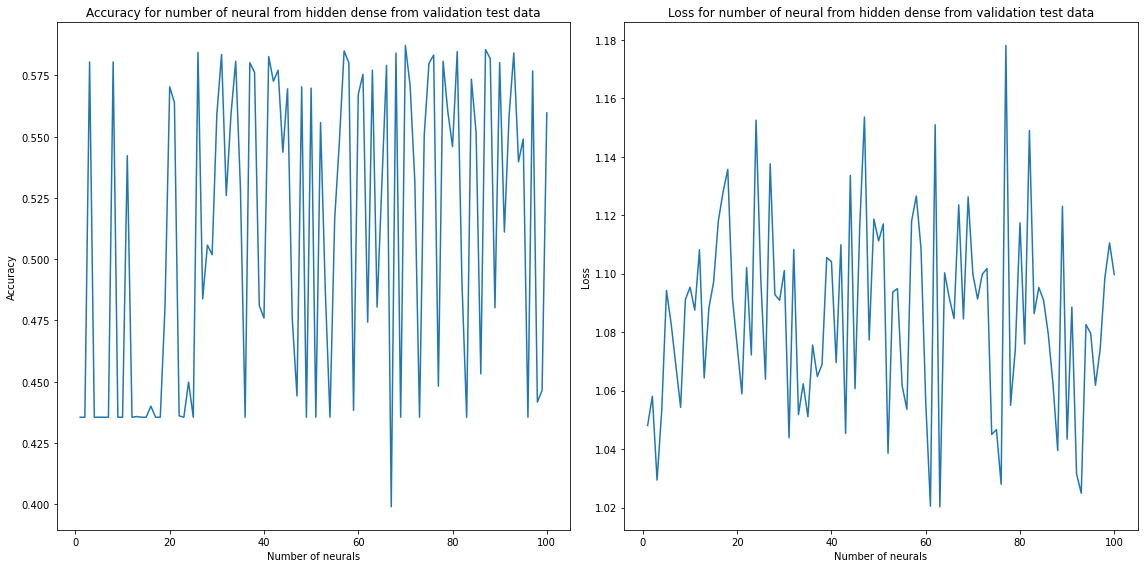

Best Number of neurons: 70
Best loss: 1.0998644828796387
Best accuracy: 0.5872436165809631


In [98]:
layer1_neuron = [i for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in layer1_neuron:
    model = Sequential()
    model.add(Dense(21, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(j, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.02))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(layer1_neuron, accuracy_list)
axes[0].set_title('Accuracy for number of neural from hidden dense from validation test data')
axes[0].set_xlabel('Number of neurals')
axes[0].set_ylabel('Accuracy')

axes[1].plot(layer1_neuron, loss_list)
axes[1].set_title('Loss for number of neural from hidden dense from validation test data')
axes[1].set_xlabel('Number of neurals')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN5.jpg')
plt.show()

full_layer1_neuron = list(zip(loss_list, accuracy_list))
full_layer1_neuron = np.array(full_layer1_neuron) 

best_accuracy_indices = np.where(full_layer1_neuron[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_layer1_neuron[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_layer1_neuron[best_index, 0]
best_accuracy = full_layer1_neuron[best_index, 1]
best_number_neuron = layer1_neuron[best_index]
print(f'Best Number of neurons: {best_number_neuron}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.4925 - accuracy: 0.3937
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2799 - accuracy: 0.4144
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2034 - accuracy: 0.4350
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1571 - accuracy: 0.4353
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1249 - accuracy: 0.4355
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1034 - accuracy: 0.4360
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0886 - accuracy: 0.4354
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0765 - accuracy: 0.4357
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.0671 - accuracy: 0.4348
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.0573 - accuracy: 0.4355

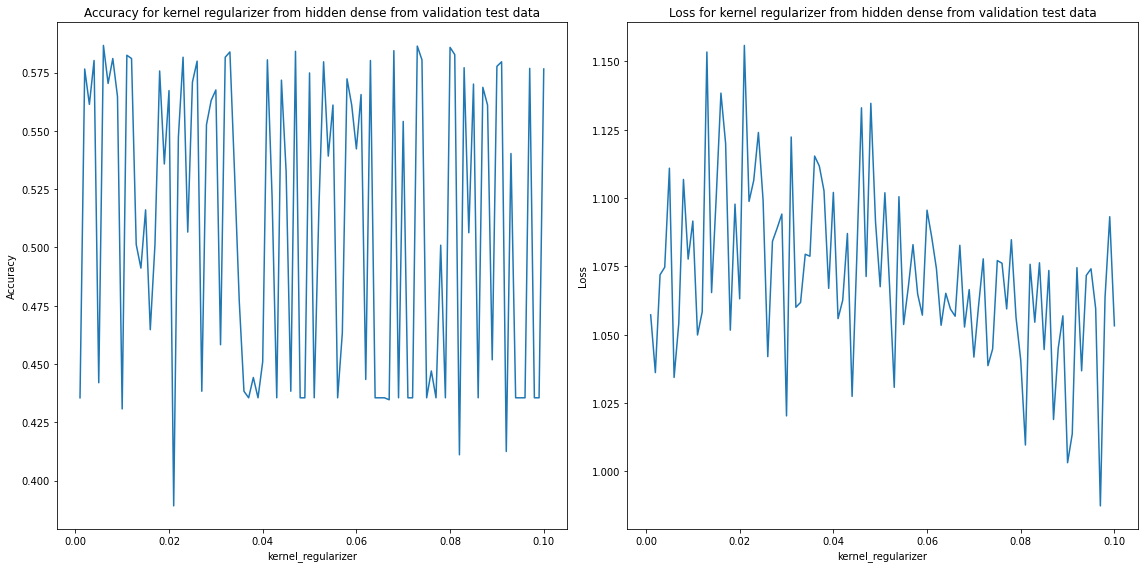

Best kernel_regularizer: 0.006
Best loss: 1.0343998670578003
Best accuracy: 0.5866816639900208


In [100]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(Dense(21, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(j)))
    model.add(Dropout(0.02))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from hidden dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from hidden dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN6.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.7287 - accuracy: 0.3864
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4320 - accuracy: 0.4281
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3478 - accuracy: 0.4385
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2932 - accuracy: 0.4438
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2548 - accuracy: 0.4454
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2244 - accuracy: 0.4418
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1993 - accuracy: 0.4511
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1793 - accuracy: 0.4482
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1610 - accuracy: 0.4581
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.1370 - accuracy: 0.4557

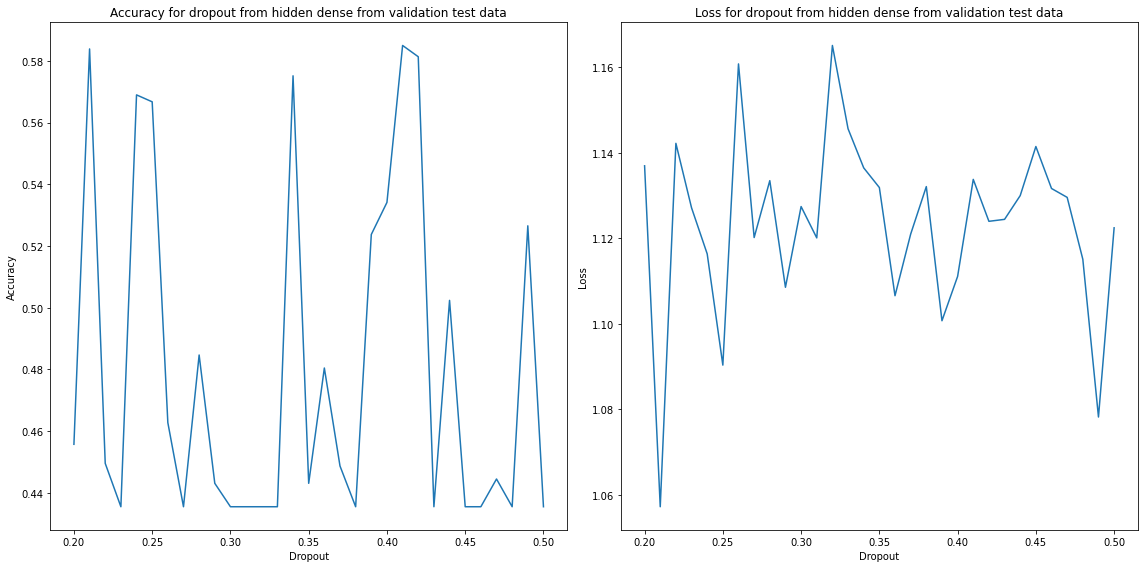

Best Dropout: 0.41
Best loss: 1.133809208869934
Best accuracy: 0.5849958062171936


In [101]:
Dropout_list = [i/100 for i in range(20, 51)]
loss_list = []
accuracy_list = []

for j in Dropout_list:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(j))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(Dropout_list, accuracy_list)
axes[0].set_title('Accuracy for dropout from hidden dense from validation test data')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Accuracy')

axes[1].plot(Dropout_list, loss_list)
axes[1].set_title('Loss for dropout from hidden dense from validation test data')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN7.jpg')
plt.show() 

full_Dropout_list = list(zip(loss_list, accuracy_list))
full_Dropout_list = np.array(full_Dropout_list) 

best_accuracy_indices = np.where(full_Dropout_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_Dropout_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_Dropout_list[best_index, 0]
best_accuracy = full_Dropout_list[best_index, 1]
best_Dropout = Dropout_list[best_index]
print(f'Best Dropout: {best_Dropout}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.3899 - accuracy: 0.4179
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2347 - accuracy: 0.4321
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2013 - accuracy: 0.4356
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1840 - accuracy: 0.4352
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1690 - accuracy: 0.4354
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1552 - accuracy: 0.4353
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1411 - accuracy: 0.4354
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1272 - accuracy: 0.4353
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1135 - accuracy: 0.4353
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.0948 - accuracy: 0.4355

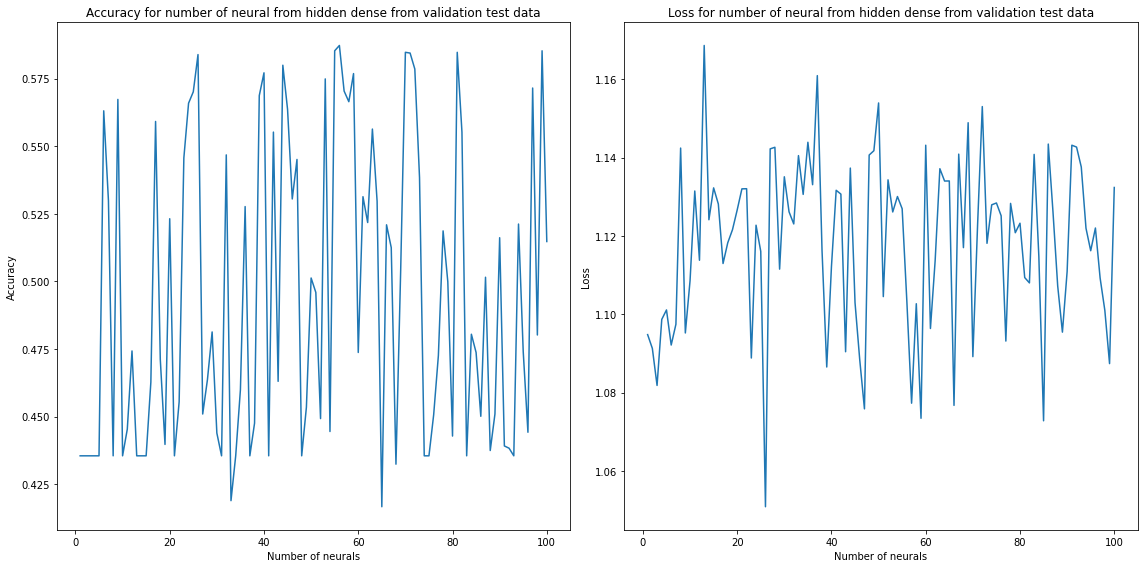

Best Number of neurons: 56
Best loss: 1.1031923294067383
Best accuracy: 0.5872436165809631


In [102]:
layer1_neuron = [i for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in layer1_neuron:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(j, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(layer1_neuron, accuracy_list)
axes[0].set_title('Accuracy for number of neural from hidden dense from validation test data')
axes[0].set_xlabel('Number of neurals')
axes[0].set_ylabel('Accuracy')

axes[1].plot(layer1_neuron, loss_list)
axes[1].set_title('Loss for number of neural from hidden dense from validation test data')
axes[1].set_xlabel('Number of neurals')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN8.jpg')
plt.show()

full_layer1_neuron = list(zip(loss_list, accuracy_list))
full_layer1_neuron = np.array(full_layer1_neuron) 

best_accuracy_indices = np.where(full_layer1_neuron[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_layer1_neuron[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_layer1_neuron[best_index, 0]
best_accuracy = full_layer1_neuron[best_index, 1]
best_number_neuron = layer1_neuron[best_index]
print(f'Best Number of neurons: {best_number_neuron}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.5563 - accuracy: 0.3977
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3302 - accuracy: 0.4258
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2799 - accuracy: 0.4413
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2561 - accuracy: 0.4377
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2305 - accuracy: 0.4379
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2110 - accuracy: 0.4462
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1928 - accuracy: 0.4490
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1771 - accuracy: 0.4536
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1616 - accuracy: 0.4558
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.1165 - accuracy: 0.5434

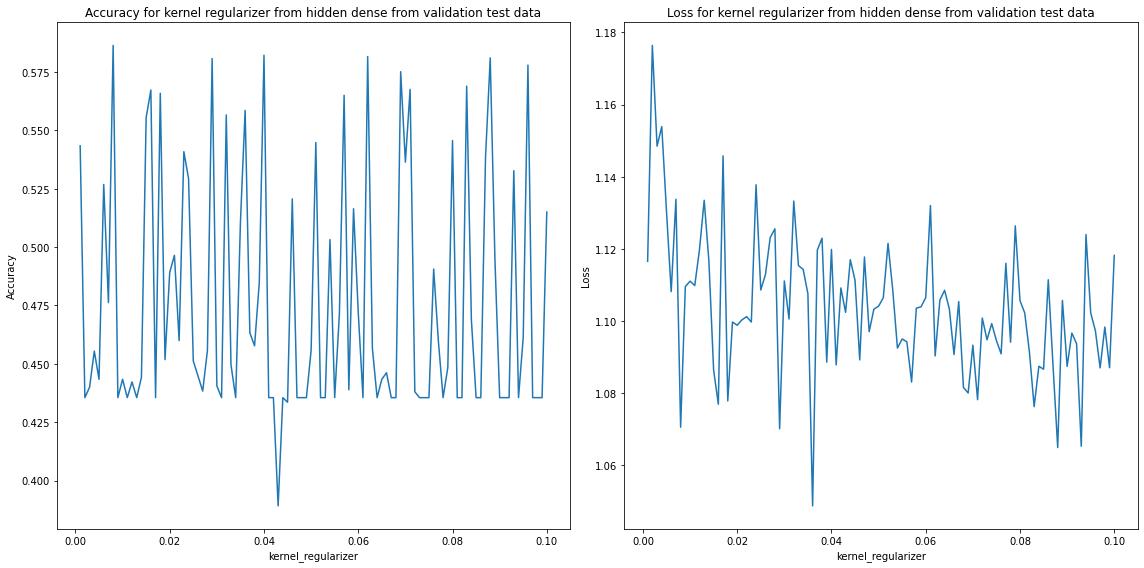

Best kernel_regularizer: 0.008
Best loss: 1.0706173181533813
Best accuracy: 0.5864006876945496


In [103]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(j)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from hidden dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from hidden dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN9.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.9177 - accuracy: 0.3998
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.5562 - accuracy: 0.4294
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4204 - accuracy: 0.4320
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3360 - accuracy: 0.4377
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2818 - accuracy: 0.4353
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2449 - accuracy: 0.4389
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2173 - accuracy: 0.4379
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1949 - accuracy: 0.4378
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1752 - accuracy: 0.4411
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.1475 - accuracy: 0.4355

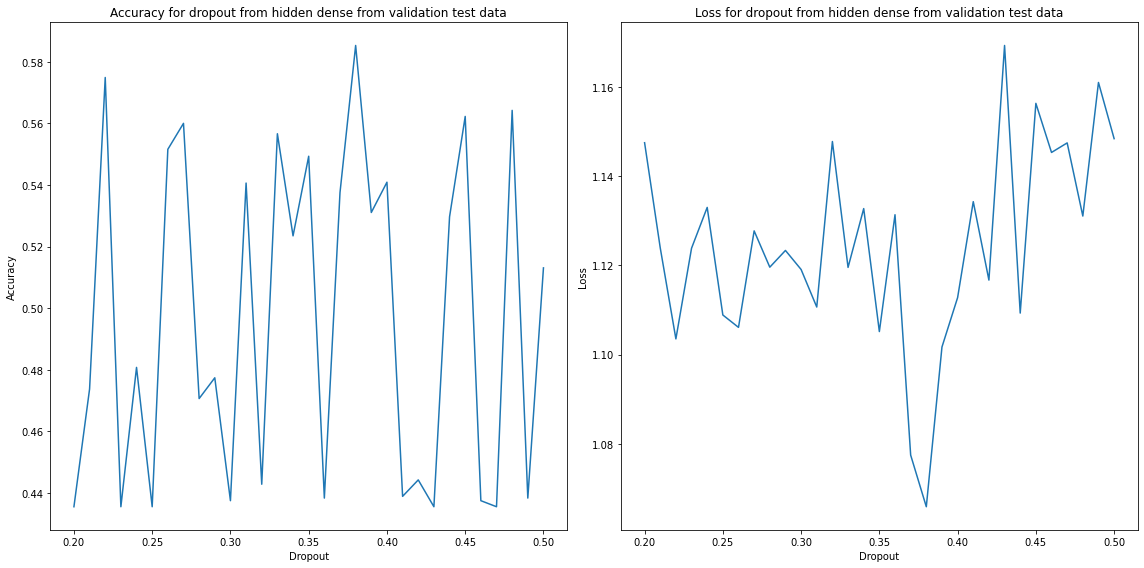

Best Dropout: 0.38
Best loss: 1.0659195184707642
Best accuracy: 0.5852767825126648


In [105]:
Dropout_list = [i/100 for i in range(20, 51)]
loss_list = []
accuracy_list = []

for j in Dropout_list:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(j))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(Dropout_list, accuracy_list)
axes[0].set_title('Accuracy for dropout from hidden dense from validation test data')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Accuracy')

axes[1].plot(Dropout_list, loss_list)
axes[1].set_title('Loss for dropout from hidden dense from validation test data')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN10.jpg')
plt.show() 

full_Dropout_list = list(zip(loss_list, accuracy_list))
full_Dropout_list = np.array(full_Dropout_list) 

best_accuracy_indices = np.where(full_Dropout_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_Dropout_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_Dropout_list[best_index, 0]
best_accuracy = full_Dropout_list[best_index, 1]
best_Dropout = Dropout_list[best_index]
print(f'Best Dropout: {best_Dropout}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.8830 - accuracy: 0.3994
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.5027 - accuracy: 0.4137
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3708 - accuracy: 0.4260
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2951 - accuracy: 0.4321
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2458 - accuracy: 0.4370
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2140 - accuracy: 0.4362
Epoch 7/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1909 - accuracy: 0.4357
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1747 - accuracy: 0.4386
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1597 - accuracy: 0.4424
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.1400 - accuracy: 0.4355

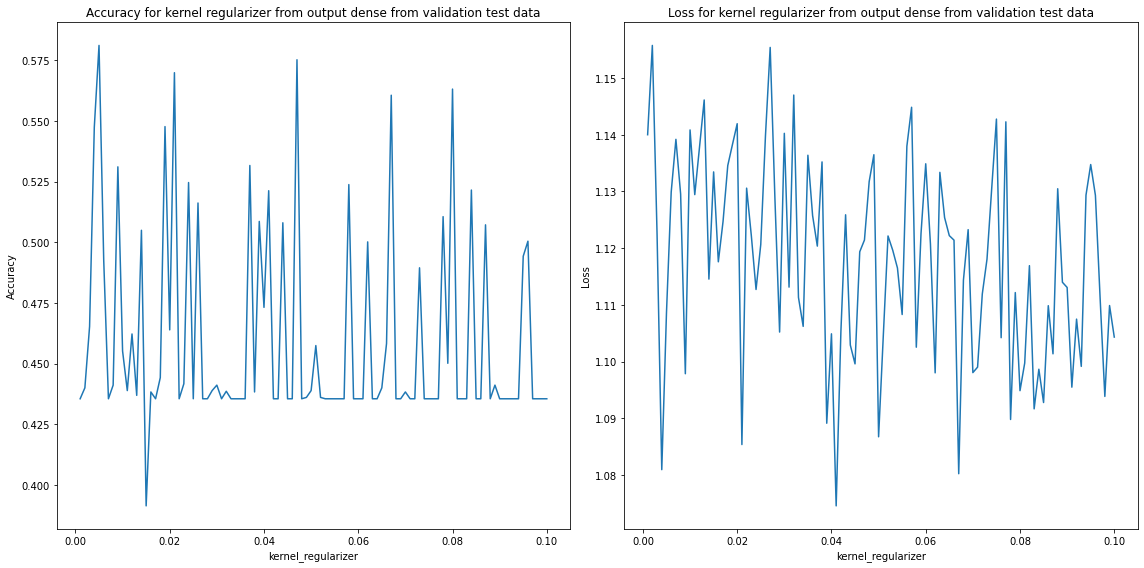

Best kernel_regularizer: 0.005
Best loss: 1.1086280345916748
Best accuracy: 0.5810620784759521


In [107]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_validate.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(j)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from output dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from output dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('NN11.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Epoch 1/50
556/556 [==============================] - 2s 2ms/step - loss: 1.8485 - accuracy: 0.3950
Epoch 2/50
556/556 [==============================] - 1s 1ms/step - loss: 1.4689 - accuracy: 0.4186
Epoch 3/50
556/556 [==============================] - 1s 1ms/step - loss: 1.3379 - accuracy: 0.4359
Epoch 4/50
556/556 [==============================] - 1s 2ms/step - loss: 1.2675 - accuracy: 0.4383
Epoch 5/50
556/556 [==============================] - 1s 1ms/step - loss: 1.2253 - accuracy: 0.4421
Epoch 6/50
556/556 [==============================] - 1s 1ms/step - loss: 1.1971 - accuracy: 0.4417
Epoch 7/50
556/556 [==============================] - 1s 1ms/step - loss: 1.1738 - accuracy: 0.4414
Epoch 8/50
556/556 [==============================] - 1s 1ms/step - loss: 1.1523 - accuracy: 0.4396
Epoch 9/50
556/556 [==============================] - 1s 1ms/step - loss: 1.1316 - accuracy: 0.4413
Epoch 10/50
556/556 [==============================] - 1s 1ms/step - loss: 1.1129 - accuracy: 0.4411

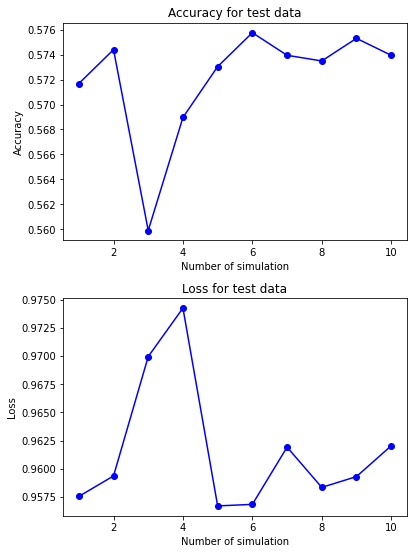

In [56]:
loss_list = []
accuracy_list = []

for i in range(10):
    model = Sequential()
    model.add(Dense(43, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_categorical, epochs=50)

    model_score = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])
    
    
fig, axes = plt.subplots(2,1, figsize=(5.85, 7.8))
axes[0].plot(range(1,11), accuracy_list, 'bo-')
axes[0].set_title('Accuracy for test data')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')

axes[1].plot(range(1,11), loss_list, 'bo-')
axes[1].set_title('Loss for test data')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Loss')

print(f"accuracy:{accuracy_list}")
print(f"loss:{loss_list}")

plt.tight_layout()
plt.savefig('NN12.jpg')
plt.show() 

# Simple RNN

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.9108 - accuracy: 0.4029
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 1.4908 - accuracy: 0.4221
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 1.3476 - accuracy: 0.4217
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2575 - accuracy: 0.4320
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 1.2060 - accuracy: 0.4326
Epoch 6/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1731 - accuracy: 0.4354
Epoch 7/10
445/445 [==============================] - 1s 3ms/step - loss: 1.1528 - accuracy: 0.4330
Epoch 8/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1395 - accuracy: 0.4354
Epoch 9/10
445/445 [==============================] - 1s 2ms/step - loss: 1.1282 - accuracy: 0.4351
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.1153 - accuracy: 0.4355

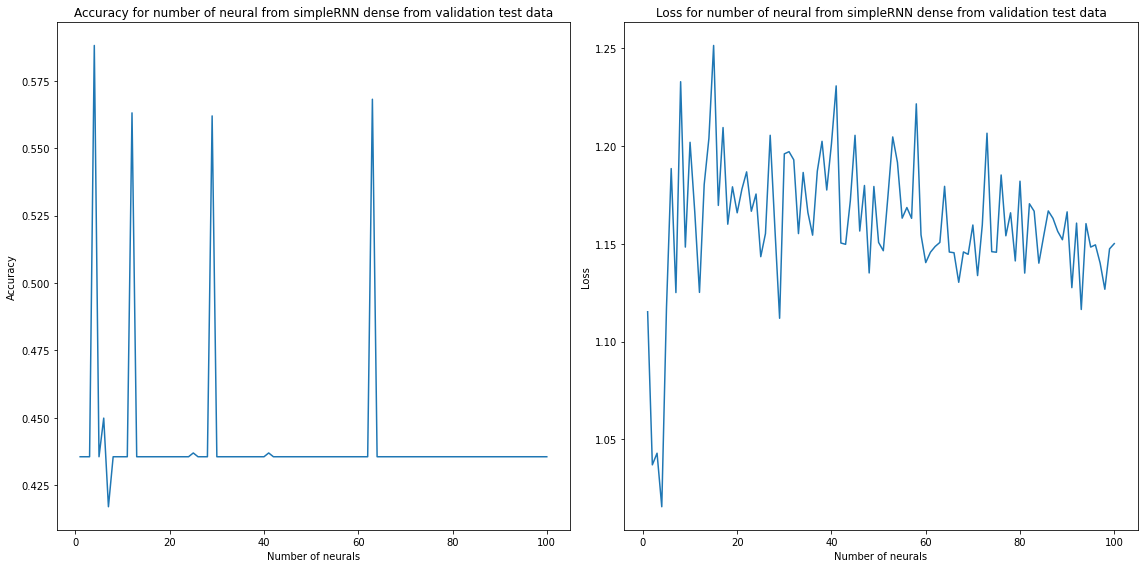

Best Number of neurons: 4
Best loss: 1.0156041383743286
Best accuracy: 0.5880865454673767


In [117]:
layer1_neuron = [i for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in layer1_neuron:
    model = Sequential()
    model.add(SimpleRNN(j, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(0.0617)))
    model.add(Dropout(0.35))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(layer1_neuron, accuracy_list)
axes[0].set_title('Accuracy for number of neural from simpleRNN dense from validation test data')
axes[0].set_xlabel('Number of neurals')
axes[0].set_ylabel('Accuracy')

axes[1].plot(layer1_neuron, loss_list)
axes[1].set_title('Loss for number of neural from simpleRNN dense from validation test data')
axes[1].set_xlabel('Number of neurals')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('RNN1.jpg')
plt.show()

full_layer1_neuron = list(zip(loss_list, accuracy_list))
full_layer1_neuron = np.array(full_layer1_neuron) 

best_accuracy_indices = np.where(full_layer1_neuron[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_layer1_neuron[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_layer1_neuron[best_index, 0]
best_accuracy = full_layer1_neuron[best_index, 1]
best_number_neuron = layer1_neuron[best_index]
print(f'Best Number of neurons: {best_number_neuron}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 1.9586 - accuracy: 0.3933
Epoch 2/10
445/445 [==============================] - 1s 3ms/step - loss: 1.5527 - accuracy: 0.4128
Epoch 3/10
445/445 [==============================] - 1s 3ms/step - loss: 1.4161 - accuracy: 0.4206
Epoch 4/10
445/445 [==============================] - 2s 4ms/step - loss: 1.3367 - accuracy: 0.4265
Epoch 5/10
445/445 [==============================] - 1s 3ms/step - loss: 1.2847 - accuracy: 0.4325
Epoch 6/10
445/445 [==============================] - 1s 3ms/step - loss: 1.2512 - accuracy: 0.4331
Epoch 7/10
445/445 [==============================] - 1s 3ms/step - loss: 1.2239 - accuracy: 0.4350
Epoch 8/10
445/445 [==============================] - 1s 3ms/step - loss: 1.2010 - accuracy: 0.4361
Epoch 9/10
445/445 [==============================] - 1s 3ms/step - loss: 1.1792 - accuracy: 0.4351
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 1.1509 - accuracy: 0.4355

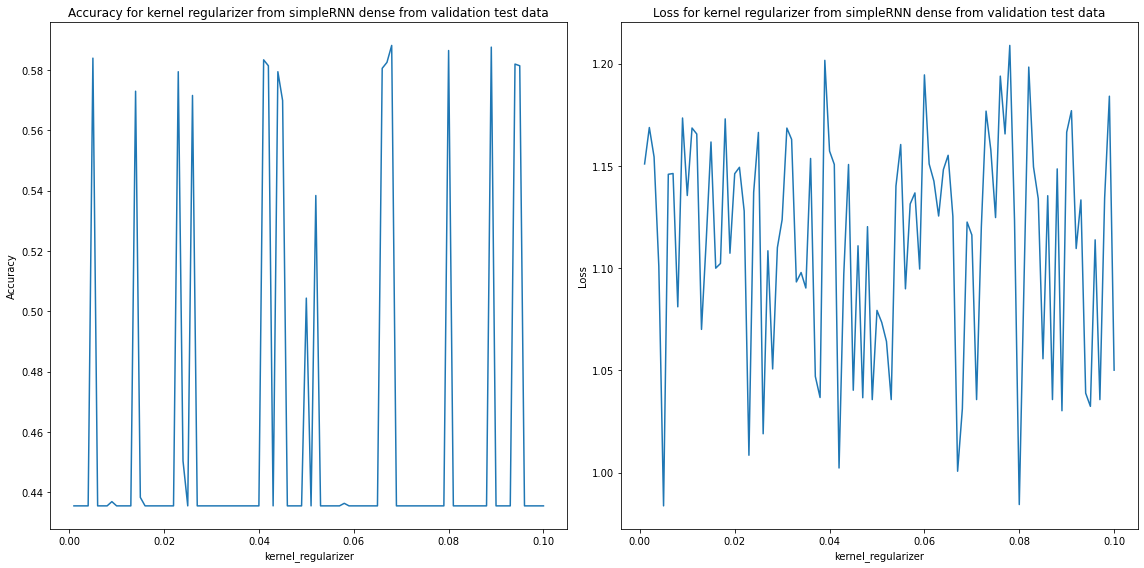

Best kernel_regularizer: 0.068
Best loss: 1.0312085151672363
Best accuracy: 0.5880865454673767


In [118]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(SimpleRNN(4, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(j)))
    model.add(Dropout(0.35))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from simpleRNN dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from simpleRNN dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('RNN2.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/10
445/445 [==============================] - 3s 3ms/step - loss: 2.0452 - accuracy: 0.3988
Epoch 2/10
445/445 [==============================] - 1s 3ms/step - loss: 1.6152 - accuracy: 0.4287
Epoch 3/10
445/445 [==============================] - 1s 3ms/step - loss: 1.4636 - accuracy: 0.4488
Epoch 4/10
445/445 [==============================] - 1s 3ms/step - loss: 1.3705 - accuracy: 0.4528
Epoch 5/10
445/445 [==============================] - 1s 3ms/step - loss: 1.3020 - accuracy: 0.4580
Epoch 6/10
445/445 [==============================] - 1s 3ms/step - loss: 1.2481 - accuracy: 0.4685
Epoch 7/10
445/445 [==============================] - 1s 3ms/step - loss: 1.1960 - accuracy: 0.4912
Epoch 8/10
445/445 [==============================] - 1s 3ms/step - loss: 1.1339 - accuracy: 0.5421
Epoch 9/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0973 - accuracy: 0.5526
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 1.0327 - accuracy: 0.5780

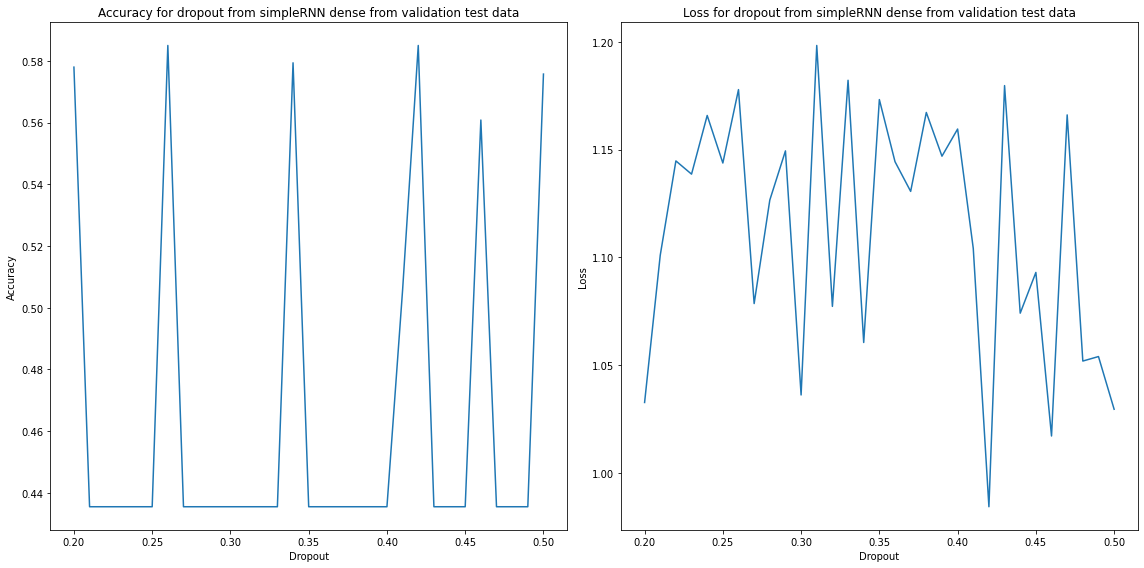

Best Dropout: 0.42
Best loss: 0.9843388199806213
Best accuracy: 0.5849958062171936


In [119]:
Dropout_list = [i/100 for i in range(20, 51)]
loss_list = []
accuracy_list = []

for j in Dropout_list:
    model = Sequential()
    model.add(SimpleRNN(4, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(0.068)))
    model.add(Dropout(j))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(Dropout_list, accuracy_list)
axes[0].set_title('Accuracy for dropout from simpleRNN dense from validation test data')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Accuracy')

axes[1].plot(Dropout_list, loss_list)
axes[1].set_title('Loss for dropout from simpleRNN dense from validation test data')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('RNN3.jpg')
plt.show() 

full_Dropout_list = list(zip(loss_list, accuracy_list))
full_Dropout_list = np.array(full_Dropout_list) 

best_accuracy_indices = np.where(full_Dropout_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_Dropout_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_Dropout_list[best_index, 0]
best_accuracy = full_Dropout_list[best_index, 1]
best_Dropout = Dropout_list[best_index]
print(f'Best Dropout: {best_Dropout}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/50
556/556 [==============================] - 3s 2ms/step - loss: 1.3803 - accuracy: 0.4347
Epoch 2/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0662 - accuracy: 0.4353
Epoch 3/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0467 - accuracy: 0.4354
Epoch 4/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0398 - accuracy: 0.4354
Epoch 5/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0376 - accuracy: 0.4354
Epoch 6/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0366 - accuracy: 0.4354
Epoch 7/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0363 - accuracy: 0.4354
Epoch 8/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0361 - accuracy: 0.4354
Epoch 9/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0357 - accuracy: 0.4354
Epoch 10/50
556/556 [==============================] - 1s 2ms/step - loss: 1.0358 - accuracy: 0.4354

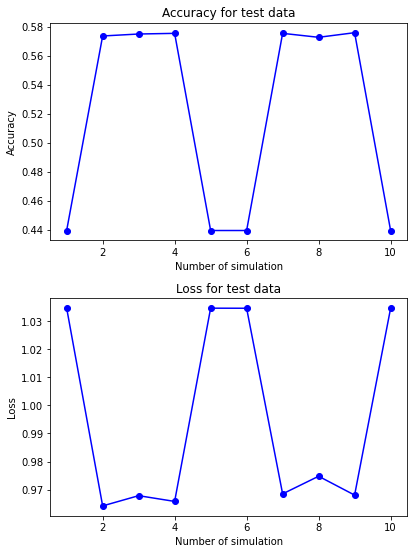

accuracy:[0.4396551847457886, 0.5735027194023132, 0.5748639106750488, 0.5753176212310791, 0.4396551847457886, 0.4396551847457886, 0.5753176212310791, 0.5725952982902527, 0.5757713317871094, 0.4396551847457886]
loss:[1.034705638885498, 0.9641856551170349, 0.9678345918655396, 0.9657859802246094, 1.034674882888794, 1.0346482992172241, 0.9684730768203735, 0.974760115146637, 0.9680387377738953, 1.034632921218872]


In [58]:
loss_list = []
accuracy_list = []

for i in range(10):
    model = Sequential()
    model.add(SimpleRNN(4, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=regularizers.l2(0.068)))
    model.add(Dropout(0.42))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_categorical, epochs=50)

    model_score = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(2,1, figsize=(5.85, 7.8))
axes[0].plot(range(1,11), accuracy_list, 'bo-')
axes[0].set_title('Accuracy for test data')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')

axes[1].plot(range(1,11), loss_list, 'bo-')
axes[1].set_title('Loss for test data')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('RNN4.jpg')
plt.show() 

print(f"accuracy:{accuracy_list}")
print(f"loss:{loss_list}")

# LSTM

Epoch 1/10
445/445 [==============================] - 4s 3ms/step - loss: 1.3534 - accuracy: 0.4351
Epoch 2/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0697 - accuracy: 0.4353
Epoch 3/10
445/445 [==============================] - 2s 4ms/step - loss: 1.0458 - accuracy: 0.4353
Epoch 4/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0380 - accuracy: 0.4353
Epoch 5/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0354 - accuracy: 0.4353
Epoch 6/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0346 - accuracy: 0.4353
Epoch 7/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0345 - accuracy: 0.4353
Epoch 8/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0345 - accuracy: 0.4353
Epoch 9/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0344 - accuracy: 0.4353
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 1.0357 - accuracy: 0.4355

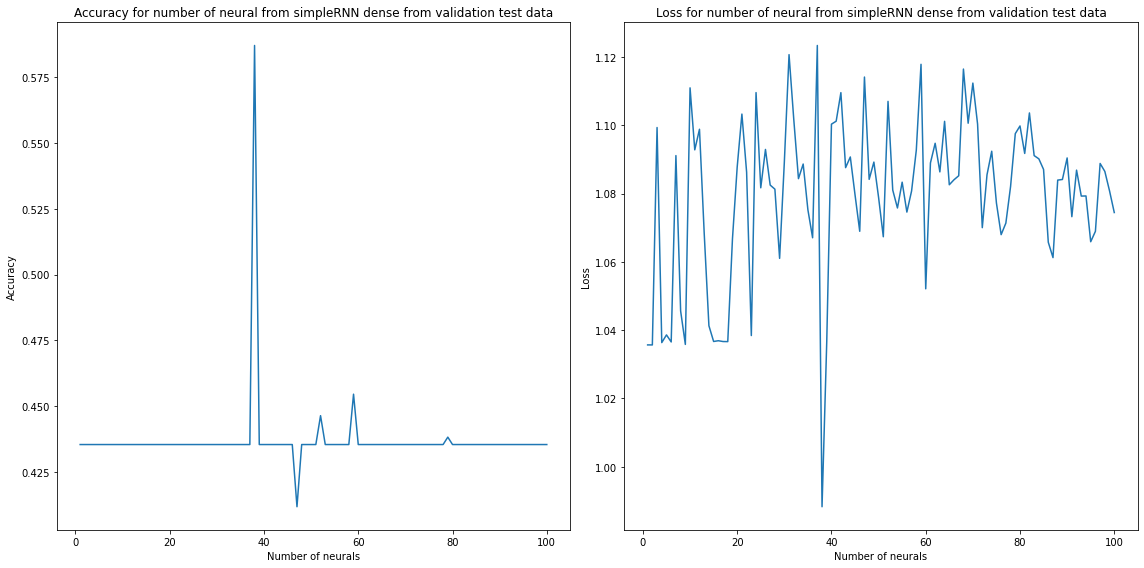

Best Number of neurons: 38
Best loss: 0.9882985353469849
Best accuracy: 0.5869626402854919


In [124]:
layer1_neuron = [i for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in layer1_neuron:
    model = Sequential()
    model.add(LSTM(j, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(0.0409)))
    model.add(Dropout(0.23))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(layer1_neuron, accuracy_list)
axes[0].set_title('Accuracy for number of neural from simpleRNN dense from validation test data')
axes[0].set_xlabel('Number of neurals')
axes[0].set_ylabel('Accuracy')

axes[1].plot(layer1_neuron, loss_list)
axes[1].set_title('Loss for number of neural from simpleRNN dense from validation test data')
axes[1].set_xlabel('Number of neurals')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('LSTM1.jpg')
plt.show()

full_layer1_neuron = list(zip(loss_list, accuracy_list))
full_layer1_neuron = np.array(full_layer1_neuron) 

best_accuracy_indices = np.where(full_layer1_neuron[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_layer1_neuron[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_layer1_neuron[best_index, 0]
best_accuracy = full_layer1_neuron[best_index, 1]
best_number_neuron = layer1_neuron[best_index]
print(f'Best Number of neurons: {best_number_neuron}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 3s 4ms/step - loss: 2.5041 - accuracy: 0.3994
Epoch 2/10
445/445 [==============================] - 2s 4ms/step - loss: 1.7409 - accuracy: 0.4235
Epoch 3/10
445/445 [==============================] - 2s 4ms/step - loss: 1.5542 - accuracy: 0.4220
Epoch 4/10
445/445 [==============================] - 2s 4ms/step - loss: 1.4288 - accuracy: 0.4298
Epoch 5/10
445/445 [==============================] - 2s 4ms/step - loss: 1.3394 - accuracy: 0.4324
Epoch 6/10
445/445 [==============================] - 2s 4ms/step - loss: 1.2705 - accuracy: 0.4344
Epoch 7/10
445/445 [==============================] - 2s 4ms/step - loss: 1.2173 - accuracy: 0.4358
Epoch 8/10
445/445 [==============================] - 2s 4ms/step - loss: 1.1762 - accuracy: 0.4350
Epoch 9/10
445/445 [==============================] - 2s 4ms/step - loss: 1.1410 - accuracy: 0.4353
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 1.1020 - accuracy: 0.4355

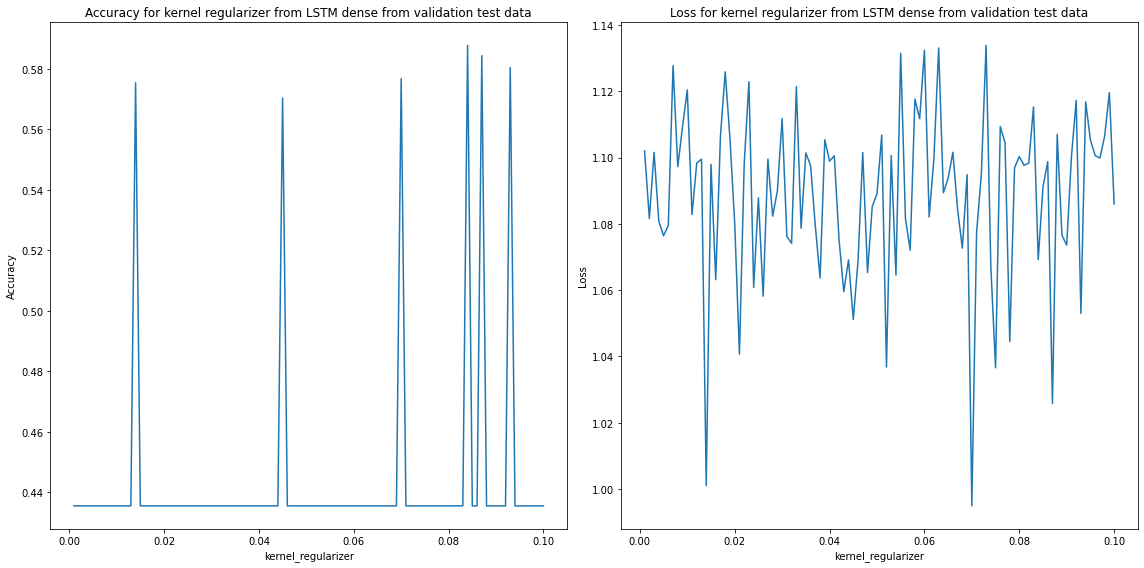

Best kernel_regularizer: 0.084
Best loss: 1.0692144632339478
Best accuracy: 0.5878055691719055


In [125]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(LSTM(38, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(j)))
    model.add(Dropout(0.23))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)


    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from LSTM dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from LSTM dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('LSTM2.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 3s 4ms/step - loss: 2.3658 - accuracy: 0.4064
Epoch 2/10
445/445 [==============================] - 2s 4ms/step - loss: 1.5332 - accuracy: 0.4128
Epoch 3/10
445/445 [==============================] - 2s 4ms/step - loss: 1.3684 - accuracy: 0.4216
Epoch 4/10
445/445 [==============================] - 2s 4ms/step - loss: 1.2745 - accuracy: 0.4308
Epoch 5/10
445/445 [==============================] - 2s 4ms/step - loss: 1.2112 - accuracy: 0.4322
Epoch 6/10
445/445 [==============================] - 2s 4ms/step - loss: 1.1651 - accuracy: 0.4344
Epoch 7/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1324 - accuracy: 0.4341
Epoch 8/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1055 - accuracy: 0.4355
Epoch 9/10
445/445 [==============================] - 2s 5ms/step - loss: 1.0870 - accuracy: 0.4353
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 1.0661 - accuracy: 0.4355

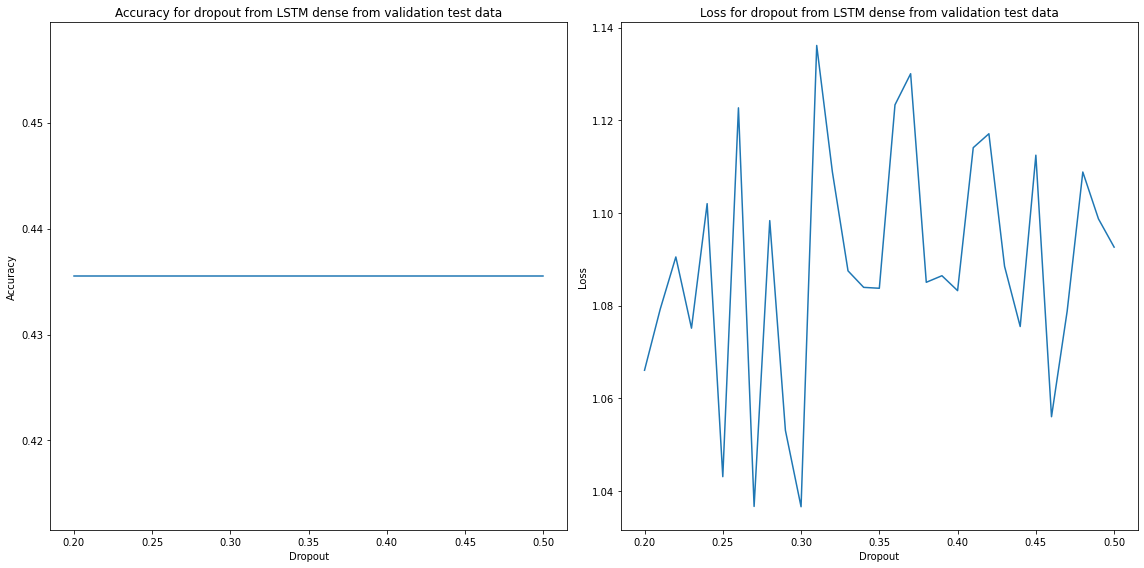

Best Dropout: 0.3
Best loss: 1.0366038084030151
Best accuracy: 0.4355155825614929


In [126]:
Dropout_list = [i/100 for i in range(20, 51)]
loss_list = []
accuracy_list = []

for j in Dropout_list:
    model = Sequential()
    model.add(LSTM(38, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(0.084)))
    model.add(Dropout(j))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)


    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(Dropout_list, accuracy_list)
axes[0].set_title('Accuracy for dropout from LSTM dense from validation test data')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Accuracy')

axes[1].plot(Dropout_list, loss_list)
axes[1].set_title('Loss for dropout from LSTM dense from validation test data')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('LSTM3.jpg')
plt.show() 

full_Dropout_list = list(zip(loss_list, accuracy_list))
full_Dropout_list = np.array(full_Dropout_list) 

best_accuracy_indices = np.where(full_Dropout_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_Dropout_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_Dropout_list[best_index, 0]
best_accuracy = full_Dropout_list[best_index, 1]
best_Dropout = Dropout_list[best_index]
print(f'Best Dropout: {best_Dropout}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/50
556/556 [==============================] - 3s 3ms/step - loss: 2.3724 - accuracy: 0.3977
Epoch 2/50
556/556 [==============================] - 2s 3ms/step - loss: 1.5825 - accuracy: 0.4226
Epoch 3/50
556/556 [==============================] - 2s 3ms/step - loss: 1.4044 - accuracy: 0.4247
Epoch 4/50
556/556 [==============================] - 2s 3ms/step - loss: 1.2923 - accuracy: 0.4332
Epoch 5/50
556/556 [==============================] - 2s 3ms/step - loss: 1.2153 - accuracy: 0.4342
Epoch 6/50
556/556 [==============================] - 2s 3ms/step - loss: 1.1609 - accuracy: 0.4356
Epoch 7/50
556/556 [==============================] - 2s 3ms/step - loss: 1.1198 - accuracy: 0.4354
Epoch 8/50
556/556 [==============================] - 2s 3ms/step - loss: 1.0894 - accuracy: 0.4353
Epoch 9/50
556/556 [==============================] - 2s 3ms/step - loss: 1.0685 - accuracy: 0.4354
Epoch 10/50
556/556 [==============================] - 1s 3ms/step - loss: 1.0539 - accuracy: 0.4354

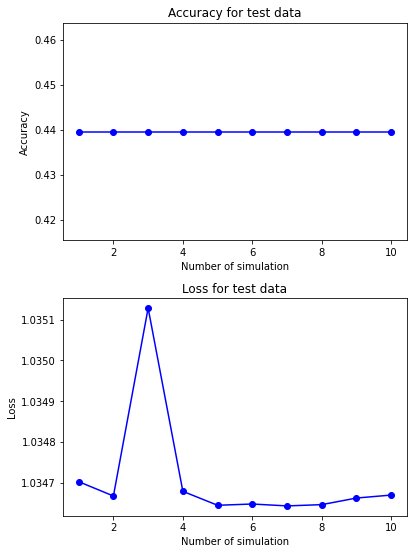

accuracy:[0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886, 0.4396551847457886]
loss:[1.0347026586532593, 1.0346674919128418, 1.0351284742355347, 1.0346789360046387, 1.0346447229385376, 1.034647822380066, 1.0346431732177734, 1.0346462726593018, 1.0346624851226807, 1.0346697568893433]


In [64]:
loss_list = []
accuracy_list = []

for i in range(10):
    model = Sequential()
    model.add(LSTM(38, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=regularizers.l2(0.084)))
    model.add(Dropout(0.3))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_categorical, epochs=50)

    model_score = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(2,1, figsize=(5.85, 7.8))
axes[0].plot(range(1,11), accuracy_list, 'bo-')
axes[0].set_title('Accuracy for test data')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')

axes[1].plot(range(1,11), loss_list, 'bo-')
axes[1].set_title('Loss for test data')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('LSTM4.jpg')
plt.show() 

print(f"accuracy:{accuracy_list}")
print(f"loss:{loss_list}")


# GRU

Epoch 1/10
445/445 [==============================] - 3s 3ms/step - loss: 1.4061 - accuracy: 0.4350
Epoch 2/10
445/445 [==============================] - 1s 3ms/step - loss: 1.1020 - accuracy: 0.4353
Epoch 3/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0647 - accuracy: 0.4353
Epoch 4/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0479 - accuracy: 0.4353
Epoch 5/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0398 - accuracy: 0.4353
Epoch 6/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0362 - accuracy: 0.4353
Epoch 7/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0349 - accuracy: 0.4353
Epoch 8/10
445/445 [==============================] - 1s 3ms/step - loss: 1.0345 - accuracy: 0.4353
Epoch 9/10
445/445 [==============================] - 2s 4ms/step - loss: 1.0344 - accuracy: 0.4353
Epoch 10/10
112/112 [==============================] - 1s 3ms/step - loss: 1.0357 - accuracy: 0.4355

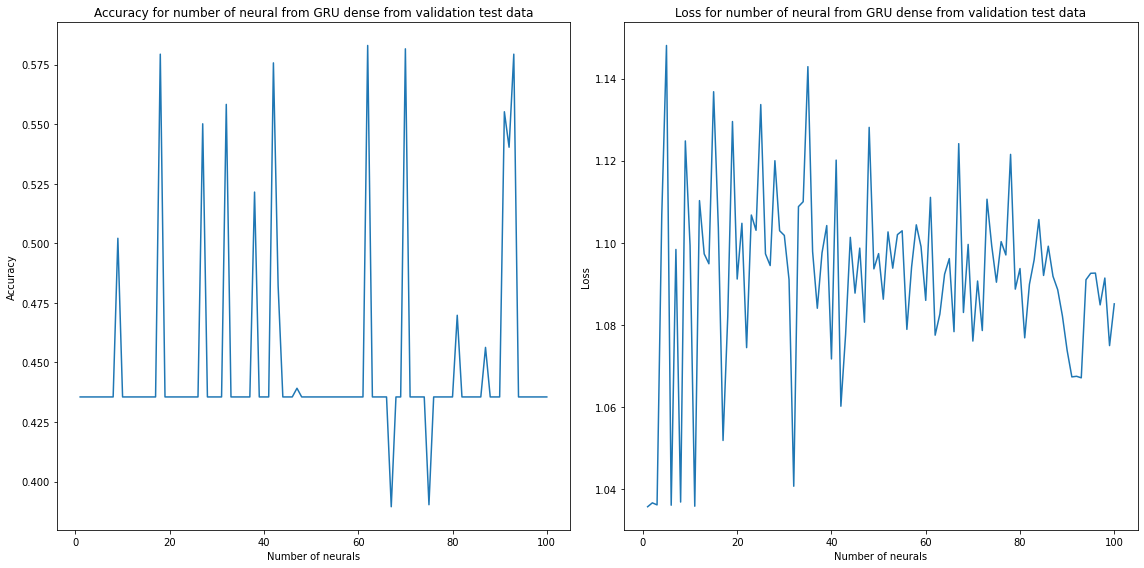

Best Number of neurons: 62
Best loss: 1.0774822235107422
Best accuracy: 0.5830289125442505


In [139]:
layer1_neuron = [i for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in layer1_neuron:
    model = Sequential()
    model.add(GRU(j, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(0.0409)))
    model.add(Dropout(0.23))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(layer1_neuron, accuracy_list)
axes[0].set_title('Accuracy for number of neural from GRU dense from validation test data')
axes[0].set_xlabel('Number of neurals')
axes[0].set_ylabel('Accuracy')

axes[1].plot(layer1_neuron, loss_list)
axes[1].set_title('Loss for number of neural from GRU dense from validation test data')
axes[1].set_xlabel('Number of neurals')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('GRU1.jpg')
plt.show()

full_layer1_neuron = list(zip(loss_list, accuracy_list))
full_layer1_neuron = np.array(full_layer1_neuron) 

best_accuracy_indices = np.where(full_layer1_neuron[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_layer1_neuron[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_layer1_neuron[best_index, 0]
best_accuracy = full_layer1_neuron[best_index, 1]
best_number_neuron = layer1_neuron[best_index]
print(f'Best Number of neurons: {best_number_neuron}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 4s 5ms/step - loss: 2.6145 - accuracy: 0.3885
Epoch 2/10
445/445 [==============================] - 2s 5ms/step - loss: 1.7880 - accuracy: 0.4182
Epoch 3/10
445/445 [==============================] - 2s 5ms/step - loss: 1.5621 - accuracy: 0.4278
Epoch 4/10
445/445 [==============================] - 2s 5ms/step - loss: 1.4167 - accuracy: 0.4350
Epoch 5/10
445/445 [==============================] - 2s 5ms/step - loss: 1.3147 - accuracy: 0.4349
Epoch 6/10
445/445 [==============================] - 2s 5ms/step - loss: 1.2432 - accuracy: 0.4349
Epoch 7/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1890 - accuracy: 0.4324
Epoch 8/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1482 - accuracy: 0.4334
Epoch 9/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1161 - accuracy: 0.4348
Epoch 10/10
112/112 [==============================] - 1s 2ms/step - loss: 1.0953 - accuracy: 0.4574

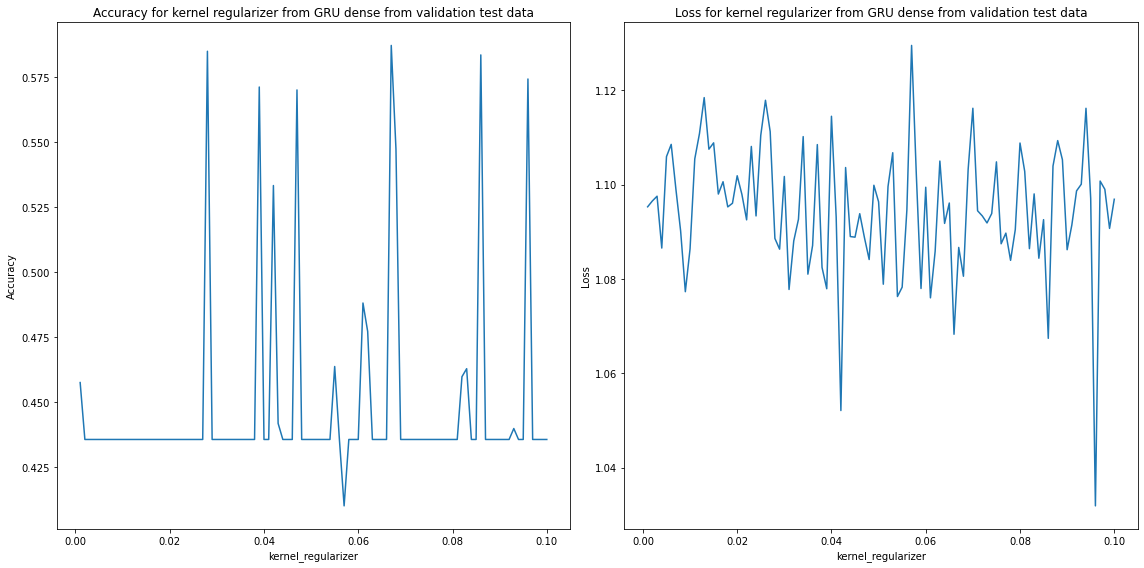

Best kernel_regularizer: 0.067
Best loss: 1.0866636037826538
Best accuracy: 0.5872436165809631


In [141]:
kernel_regularizer_list = [i/1000 for i in range(1, 101)]
loss_list = []
accuracy_list = []

for j in kernel_regularizer_list:
    model = Sequential()
    model.add(GRU(62, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(j)))
    model.add(Dropout(0.23))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(kernel_regularizer_list, accuracy_list)
axes[0].set_title('Accuracy for kernel regularizer from GRU dense from validation test data')
axes[0].set_xlabel('kernel_regularizer')
axes[0].set_ylabel('Accuracy')

axes[1].plot(kernel_regularizer_list, loss_list)
axes[1].set_title('Loss for kernel regularizer from GRU dense from validation test data')
axes[1].set_xlabel('kernel_regularizer')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('GRU2.jpg')
plt.show() 

full_kernel_regularizer_list = list(zip(loss_list, accuracy_list))
full_kernel_regularizer_list = np.array(full_kernel_regularizer_list) 

best_accuracy_indices = np.where(full_kernel_regularizer_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_kernel_regularizer_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_kernel_regularizer_list[best_index, 0]
best_accuracy = full_kernel_regularizer_list[best_index, 1]
best_kernel_regularizer = kernel_regularizer_list[best_index]
print(f'Best kernel_regularizer: {best_kernel_regularizer}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')

Epoch 1/10
445/445 [==============================] - 4s 5ms/step - loss: 2.6538 - accuracy: 0.3876
Epoch 2/10
445/445 [==============================] - 2s 5ms/step - loss: 1.8199 - accuracy: 0.4164
Epoch 3/10
445/445 [==============================] - 2s 5ms/step - loss: 1.6176 - accuracy: 0.4282
Epoch 4/10
445/445 [==============================] - 3s 6ms/step - loss: 1.4808 - accuracy: 0.4291
Epoch 5/10
445/445 [==============================] - 2s 5ms/step - loss: 1.3783 - accuracy: 0.4317
Epoch 6/10
445/445 [==============================] - 3s 6ms/step - loss: 1.3005 - accuracy: 0.4311
Epoch 7/10
445/445 [==============================] - 2s 5ms/step - loss: 1.2410 - accuracy: 0.4351
Epoch 8/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1931 - accuracy: 0.4355
Epoch 9/10
445/445 [==============================] - 2s 5ms/step - loss: 1.1530 - accuracy: 0.4348
Epoch 10/10
112/112 [==============================] - 1s 2ms/step - loss: 1.1088 - accuracy: 0.4355

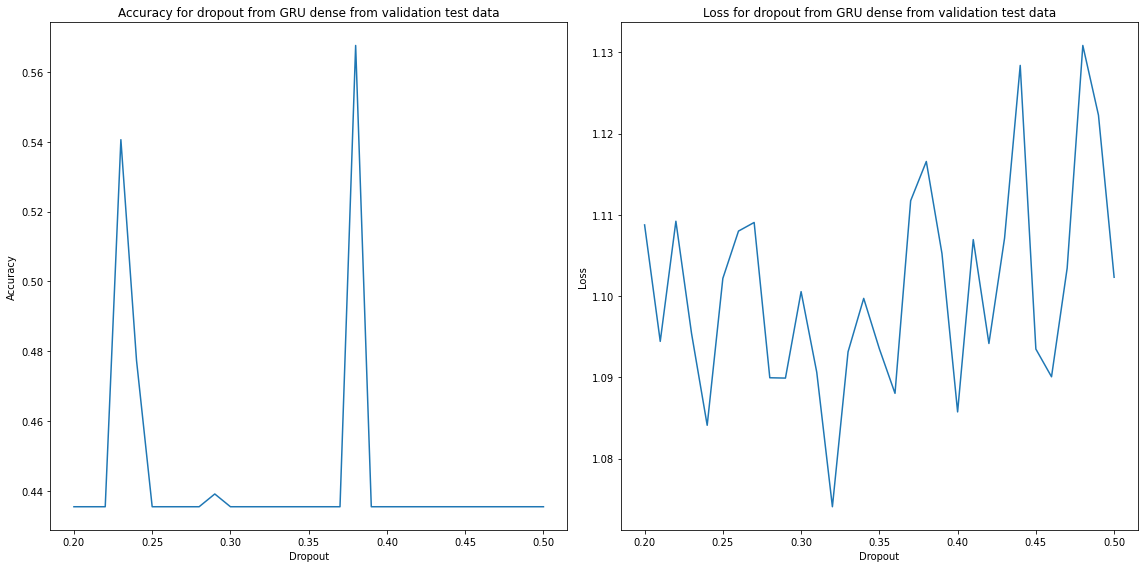

Best Dropout: 0.38
Best loss: 1.1165670156478882
Best accuracy: 0.5675751566886902


In [143]:
Dropout_list = [i/100 for i in range(20, 51)]
loss_list = []
accuracy_list = []

for j in Dropout_list:
    model = Sequential()
    model.add(GRU(62, activation='relu', input_shape=(X_validate.shape[1], 1), kernel_regularizer=regularizers.l2(0.067)))
    model.add(Dropout(j))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_validate, y_validate_categorical, epochs=10)

    model_score = model.evaluate(X_test_validate, y_test_validate_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(Dropout_list, accuracy_list)
axes[0].set_title('Accuracy for dropout from GRU dense from validation test data')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Accuracy')

axes[1].plot(Dropout_list, loss_list)
axes[1].set_title('Loss for dropout from GRU dense from validation test data')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('GRU3.jpg')
plt.show() 

full_Dropout_list = list(zip(loss_list, accuracy_list))
full_Dropout_list = np.array(full_Dropout_list) 

best_accuracy_indices = np.where(full_Dropout_list[:, 1] == max(accuracy_list))[0]
best_loss_index = np.argmin(full_Dropout_list[best_accuracy_indices, 0])
best_index = best_accuracy_indices[best_loss_index]
best_loss = full_Dropout_list[best_index, 0]
best_accuracy = full_Dropout_list[best_index, 1]
best_Dropout = Dropout_list[best_index]
print(f'Best Dropout: {best_Dropout}')
print(f'Best loss: {best_loss}')
print(f'Best accuracy: {best_accuracy}')


Epoch 1/50
556/556 [==============================] - 3s 2ms/step - loss: 2.5224 - accuracy: 0.3892
Epoch 2/50
556/556 [==============================] - 2s 3ms/step - loss: 1.6924 - accuracy: 0.4122
Epoch 3/50
556/556 [==============================] - 2s 3ms/step - loss: 1.4918 - accuracy: 0.4234
Epoch 4/50
556/556 [==============================] - 2s 4ms/step - loss: 1.3573 - accuracy: 0.4300
Epoch 5/50
556/556 [==============================] - 2s 3ms/step - loss: 1.2660 - accuracy: 0.4342
Epoch 6/50
556/556 [==============================] - 1s 3ms/step - loss: 1.2005 - accuracy: 0.4335
Epoch 7/50
556/556 [==============================] - 1s 3ms/step - loss: 1.1523 - accuracy: 0.4346
Epoch 8/50
556/556 [==============================] - 1s 2ms/step - loss: 1.1155 - accuracy: 0.4353
Epoch 9/50
556/556 [==============================] - 1s 3ms/step - loss: 1.0875 - accuracy: 0.4350
Epoch 10/50
556/556 [==============================] - 2s 3ms/step - loss: 1.0673 - accuracy: 0.4354

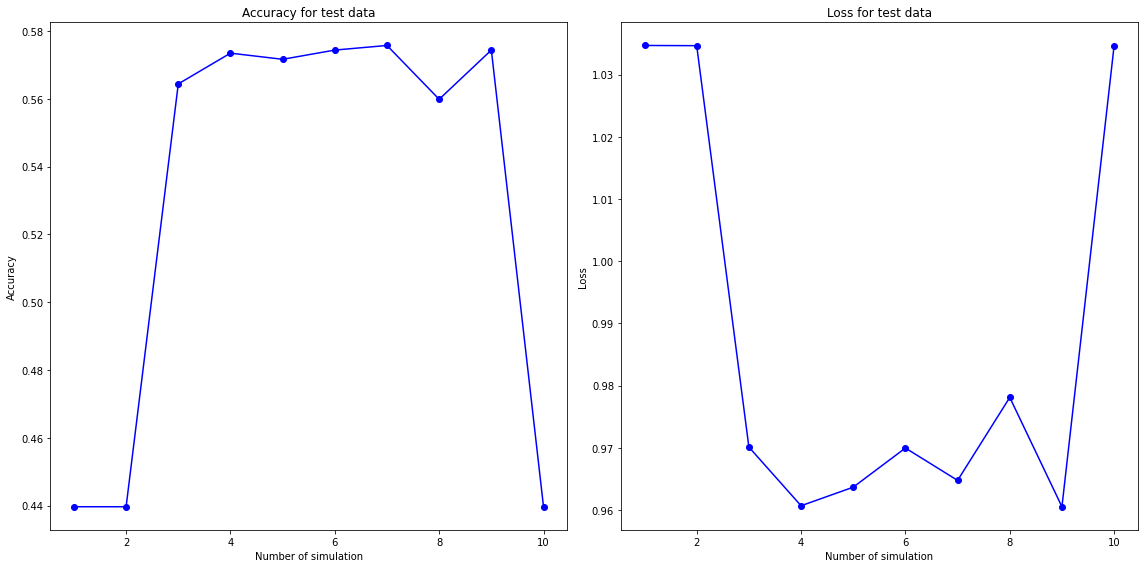

accuracy:[0.4396551847457886, 0.4396551847457886, 0.5644283294677734, 0.5735027194023132, 0.5716878175735474, 0.5744101405143738, 0.5757713317871094, 0.5598911046981812, 0.5744101405143738, 0.4396551847457886]
loss:[1.0346839427947998, 1.0346494913101196, 0.9701183438301086, 0.9606803059577942, 0.9636670351028442, 0.9699620604515076, 0.9647571444511414, 0.9780973792076111, 0.9605226516723633, 1.0346530675888062]


In [54]:
loss_list = []
accuracy_list = []

for i in range(10):
    model = Sequential()
    model.add(GRU(62, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=regularizers.l2(0.067)))
    model.add(Dropout(0.38))
    model.add(Dense(43, activation='relu', kernel_regularizer=regularizers.l2(0.039)))
    model.add(Dropout(0.46))
    model.add(Dense(70, activation='tanh', kernel_regularizer=regularizers.l2(0.006)))
    model.add(Dropout(0.41))
    model.add(Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.008)))
    model.add(Dropout(0.38))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

    optimizer = Adam(learning_rate=0.0006)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_categorical, epochs=50)

    model_score = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_categorical)
    loss_list.append(model_score[0])
    accuracy_list.append(model_score[1])

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].plot(range(1,11), accuracy_list, 'bo-')
axes[0].set_title('Accuracy for test data')
axes[0].set_xlabel('Number of simulation')
axes[0].set_ylabel('Accuracy')

axes[1].plot(range(1,11), loss_list, 'bo-')
axes[1].set_title('Loss for test data')
axes[1].set_xlabel('Number of simulation')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.savefig('GRU4.jpg')
plt.show()

print(f"accuracy:{accuracy_list}")
print(f"loss:{loss_list}")